Crew based observer reporting of bycatch mapping on iMMA- IUCN 

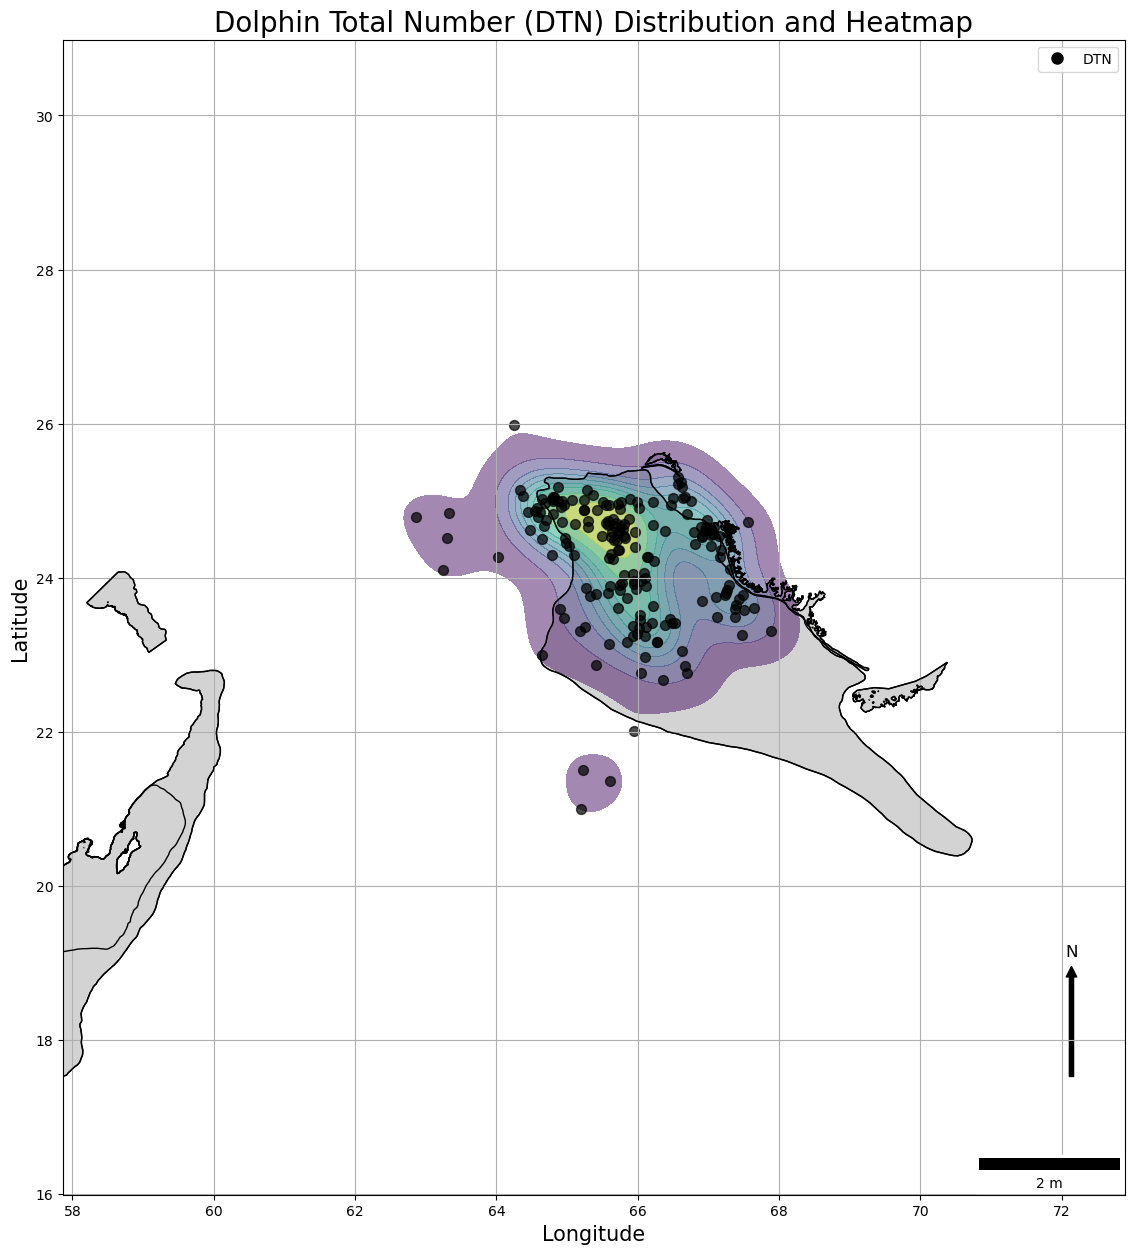

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyArrowPatch
from matplotlib.lines import Line2D
import matplotlib_scalebar.scalebar as sb

# Load the Excel file from the specified path
file_path = r'C:\Users\Shoaib\Desktop\CBOP\CBOB_2012_17_v9.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet2')

# Ensure the GPS coordinate columns are numeric
df['Lat'] = pd.to_numeric(df['Lat'], errors='coerce')
df['Long'] = pd.to_numeric(df['Long'], errors='coerce')

# Drop rows with missing GPS coordinates and DTN data
df = df.dropna(subset=['Lat', 'Long', 'DTN'])

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['Long'], df['Lat']),
    crs="EPSG:4326"  # Set the coordinate reference system to WGS84
)

# Load the shapefile
shapefile_path = r'C:\Users\Shoaib\Downloads\Compressed\iucn-imma\iucn-imma\iucn-imma.shp'
shapefile = gpd.read_file(shapefile_path)

# Function to plot DTN distribution and heatmap on a single map
def plot_dtn_distribution_and_heatmap(gdf, dtn_column, shapefile):
    try:
        dtn_gdf = gdf.dropna(subset=[dtn_column])
        
        if dtn_gdf.empty:
            print(f"No data available for {dtn_column}")
            return

        # Plotting the map
        fig, ax = plt.subplots(figsize=(15, 15))
        shapefile.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
        shapefile.plot(ax=ax, color='lightgrey', edgecolor='black')

        # Plot heatmap
        try:
            sns.kdeplot(
                x=dtn_gdf.geometry.x, 
                y=dtn_gdf.geometry.y, 
                cmap='viridis', 
                fill=True, 
                ax=ax, 
                alpha=0.5
            )
        except ValueError as e:
            print(f"Skipping DTN plotting error: {e}")

        # Plot DTN points
        dtn_gdf.plot(ax=ax, color='black', markersize=50, alpha=0.7, marker='o')

        # Set x and y axis limits to zoom in on the area of interest
        ax.set_xlim(dtn_gdf.geometry.x.min() - 5, dtn_gdf.geometry.x.max() + 5)
        ax.set_ylim(dtn_gdf.geometry.y.min() - 5, dtn_gdf.geometry.y.max() + 5)

        # Adding a scale bar
        scale_bar = sb.ScaleBar(1, location='lower right')
        ax.add_artist(scale_bar)

        # Adding a north arrow
        arrow = FancyArrowPatch((0.95, 0.1), (0.95, 0.2), transform=ax.transAxes,
                                color='black', mutation_scale=15)
        ax.annotate('N', xy=(0.95, 0.21), xycoords='axes fraction', fontsize=12,
                    ha='center', va='center')
        ax.add_patch(arrow)

        plt.title('Dolphin Total Number (DTN) Distribution and Heatmap', fontsize=20)
        plt.xlabel('Longitude', fontsize=15)
        plt.ylabel('Latitude', fontsize=15)
        plt.grid(True)
        legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='DTN')]
        ax.legend(handles=legend_elements, loc='upper right')

        plt.show()
    except Exception as e:
        print(f"An error occurred while processing DTN: {e}")
        return

# Load and preprocess data
df = pd.read_excel(file_path, sheet_name='Sheet2')
df = df.dropna(subset=['Lat', 'Long'])
df['Lat'] = pd.to_numeric(df['Lat'], errors='coerce')
df['Long'] = pd.to_numeric(df['Long'], errors='coerce')

# Drop rows with missing DTN data
df = df.dropna(subset=['DTN'])

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['Long'], df['Lat']),
    crs="EPSG:4326"
)

# Plot DTN distribution and heatmap on a single map
plot_dtn_distribution_and_heatmap(gdf, 'DTN', shapefile)


Integrating Ecological and Fishing Seasons for Analyzing Dolphin Bycatch 
To analyze dolphin bycatch (Dolphin Total Number, DTN, and Dolphin Total Weight, DTW) in the study areas, a function was developed to systematically categorize bycatch data according to key ecological and fishing seasons. This function considers the nesting season of green turtles, the fishing season of tuna gillnet fisheries, and the breeding seasons of various cetacean species, including dolphins, porpoises, and whales, to understand their impact on bycatch rates.
Green Turtle Nesting Season
The green turtle nesting season along the Pakistani coastline spans from September to February. During this period, green turtles come ashore to nest, coinciding with active fishing operations along the coast. This overlap presents a risk of bycatch not only for turtles but also for dolphins and other non-target species. Analyzing bycatch data during the green turtle nesting season is critical to understanding the effects of these overlapping ecological and human activities on marine biodiversity, including dolphin bycatch rates.
Fishing Season for Tuna Gillnet Fisheries
The tuna gillnet fishing season in Pakistan extends from August to May, a period marked by intensive fishing activity. The use of gillnets during this time can heighten the risk of bycatch of non-target species, such as dolphins, porpoises, and whales. Aligning bycatch data with this fishing season allows for an examination of the correlation between fishing intensity, duration, and dolphin bycatch rates, providing valuable insights into seasonal peaks and high-risk periods for bycatch.
Breeding Seasons of Dolphins:
The function incorporates the breeding seasons of various dolphin species in the Arabian Sea to assess their vulnerability to bycatch throughout the year. Species such as the Indo-Pacific Bottlenose Dolphin, Spinner Dolphin, Indian Ocean Humpback Dolphin, and Pantropical Spotted Dolphin have breeding seasons in April-May and September-October. These specific periods are critical, as dolphins are likely to be more concentrated or active, increasing their susceptibility to fishing gear interactions. Other species, including the Common Bottlenose Dolphin, Striped Dolphin, Killer Whale, False Killer Whale, Long-Beaked Common Dolphin, and Rough-Toothed Dolphin, breed year-round, indicating a consistent risk of bycatch across all months. Recognizing these breeding seasons allows for a more precise temporal analysis of dolphin bycatch patterns.
Breeding Season of Porpoises
The Indo-Pacific Finless Porpoise, a porpoise species in the region, has a defined breeding season from April to May and September to October, similar to several dolphin species. During these periods, the species may be more active or occupy specific areas, increasing their vulnerability to bycatch. Including porpoise breeding seasons in the analysis is essential for a comprehensive understanding of bycatch risks across different cetacean groups.
Breeding Seasons of Whales
The breeding seasons of whale species in the Arabian Sea are also incorporated into the function. Species such as the Blue Whale breed from November to February, the Humpback Whale from December to April, and the Arabian Sea Humpback Whale from January to March. In contrast, the Sperm Whale breeds from April to September. Other whale species, including Bryde's Whale, Lesser Sperm Whale, Pygmy Sperm Whale, Cuvier's Beaked Whale, Longman's Beaked Whale, Omura's Whale, and Killer Whale, have year-round breeding seasons. Understanding these distinct breeding periods is crucial for identifying specific times when these species are more vulnerable to bycatch and for informing potential mitigation measures.


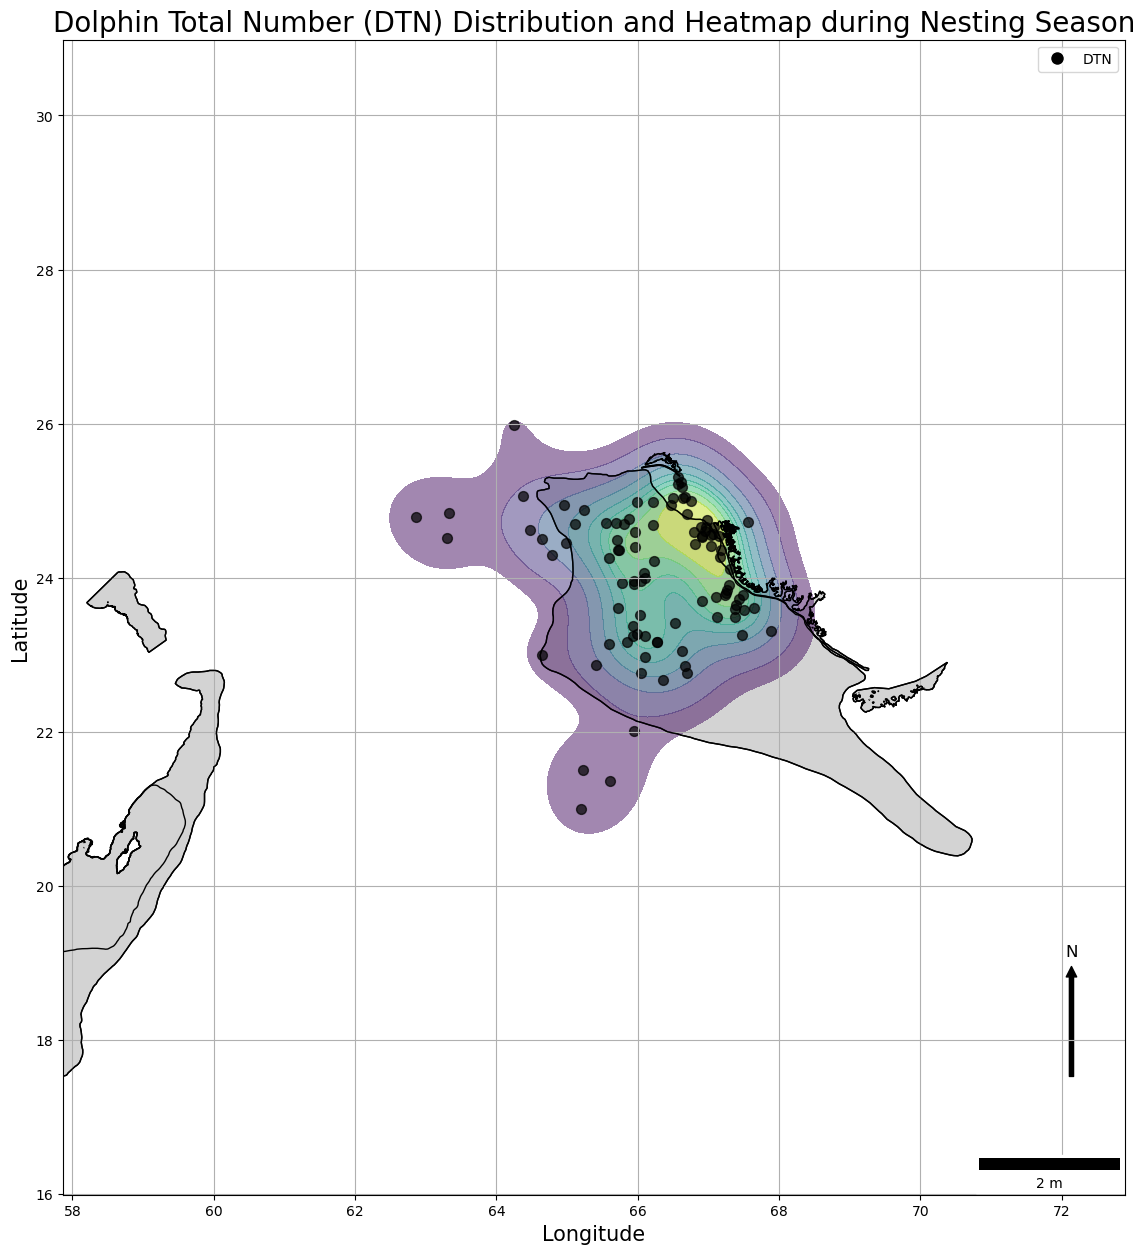

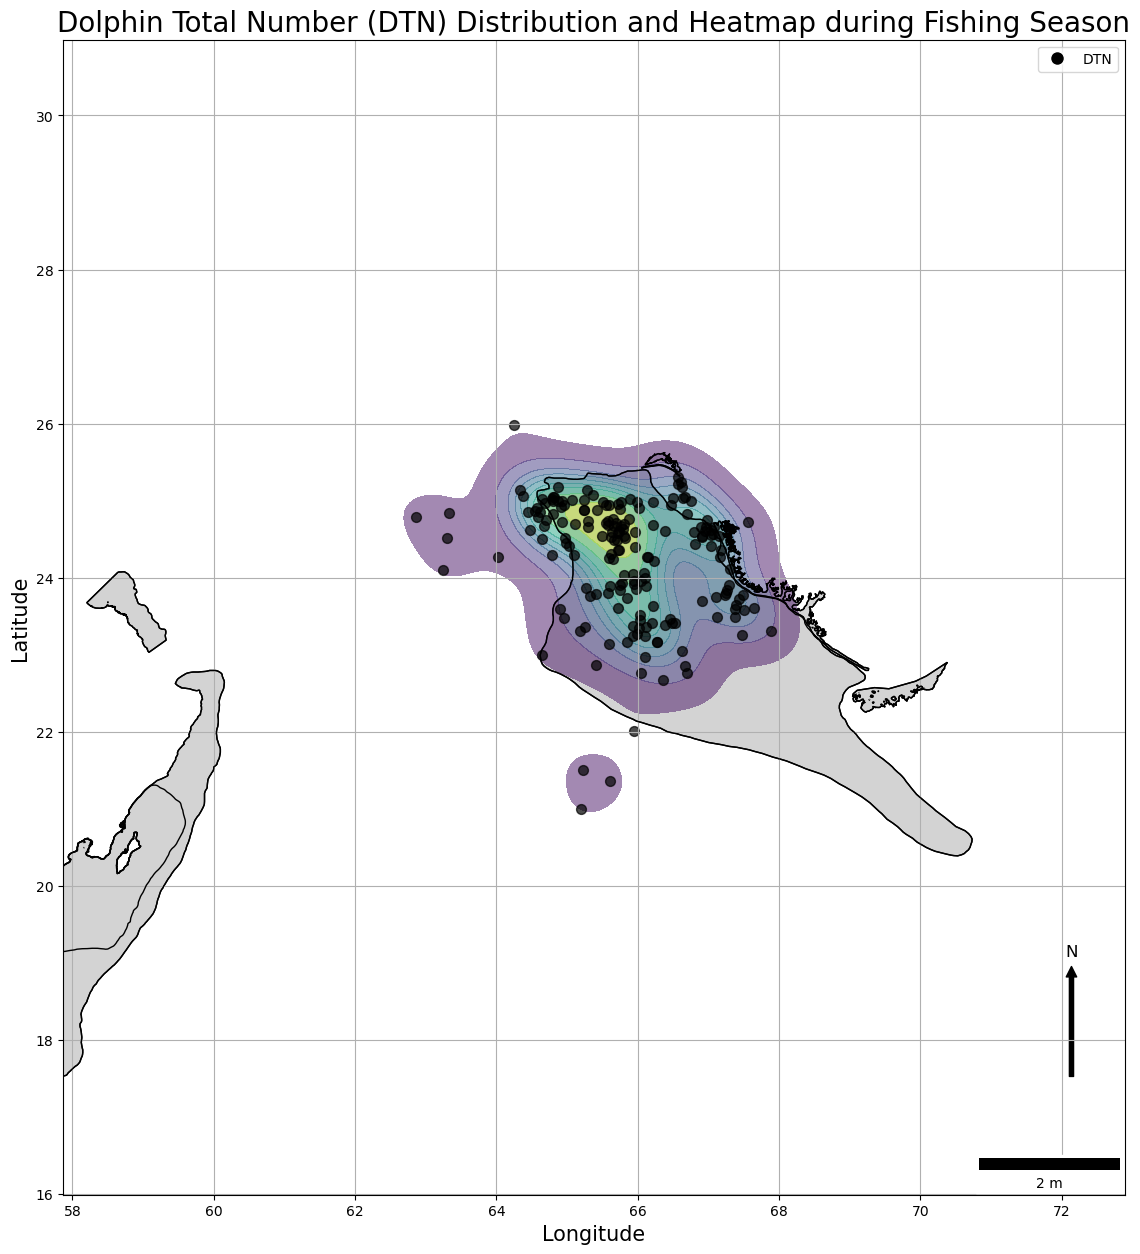

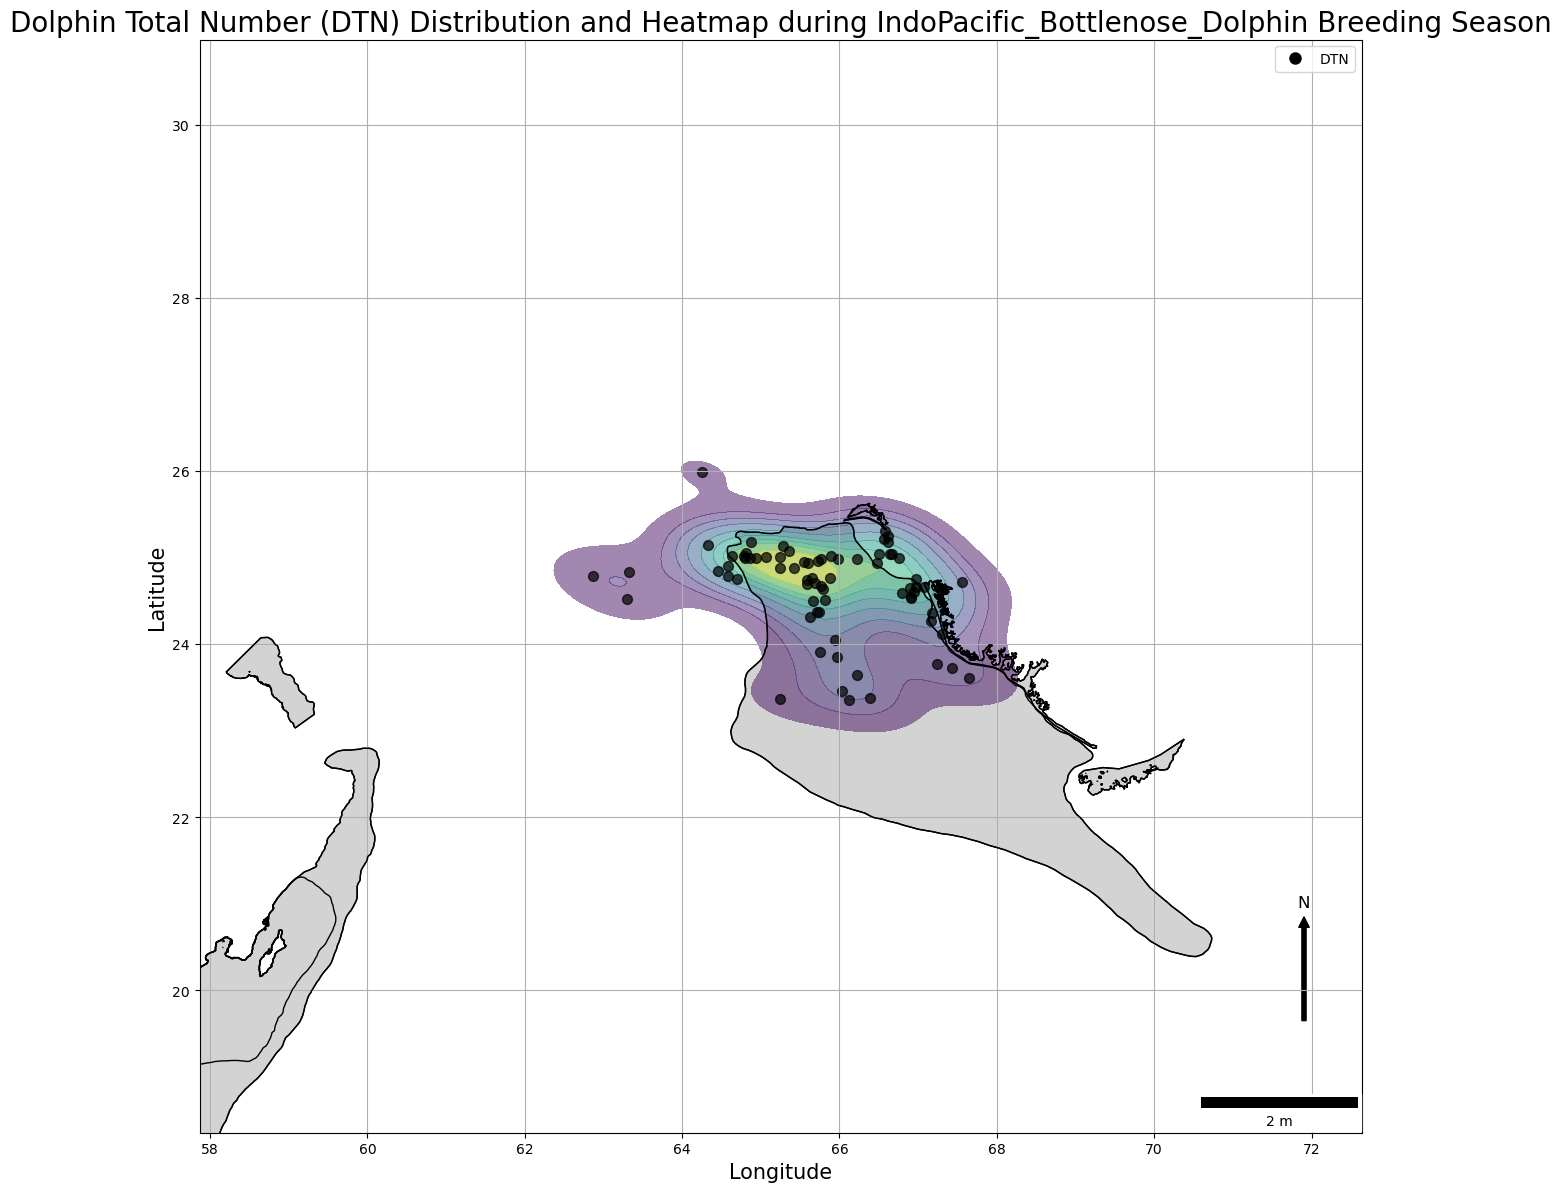

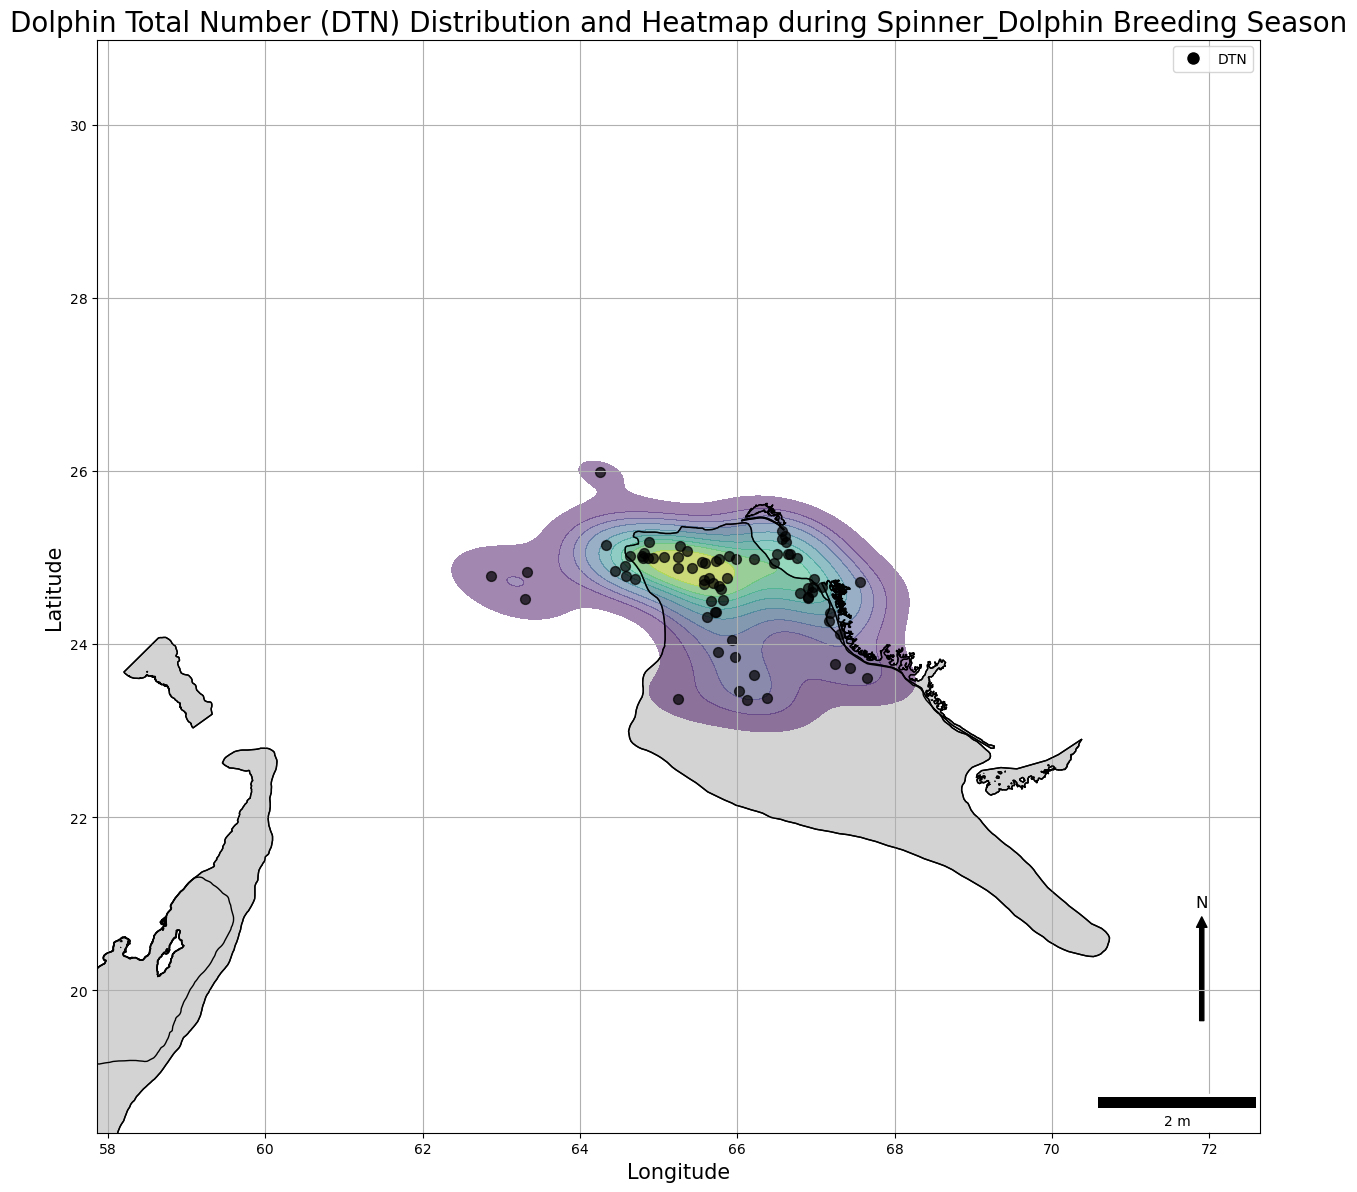

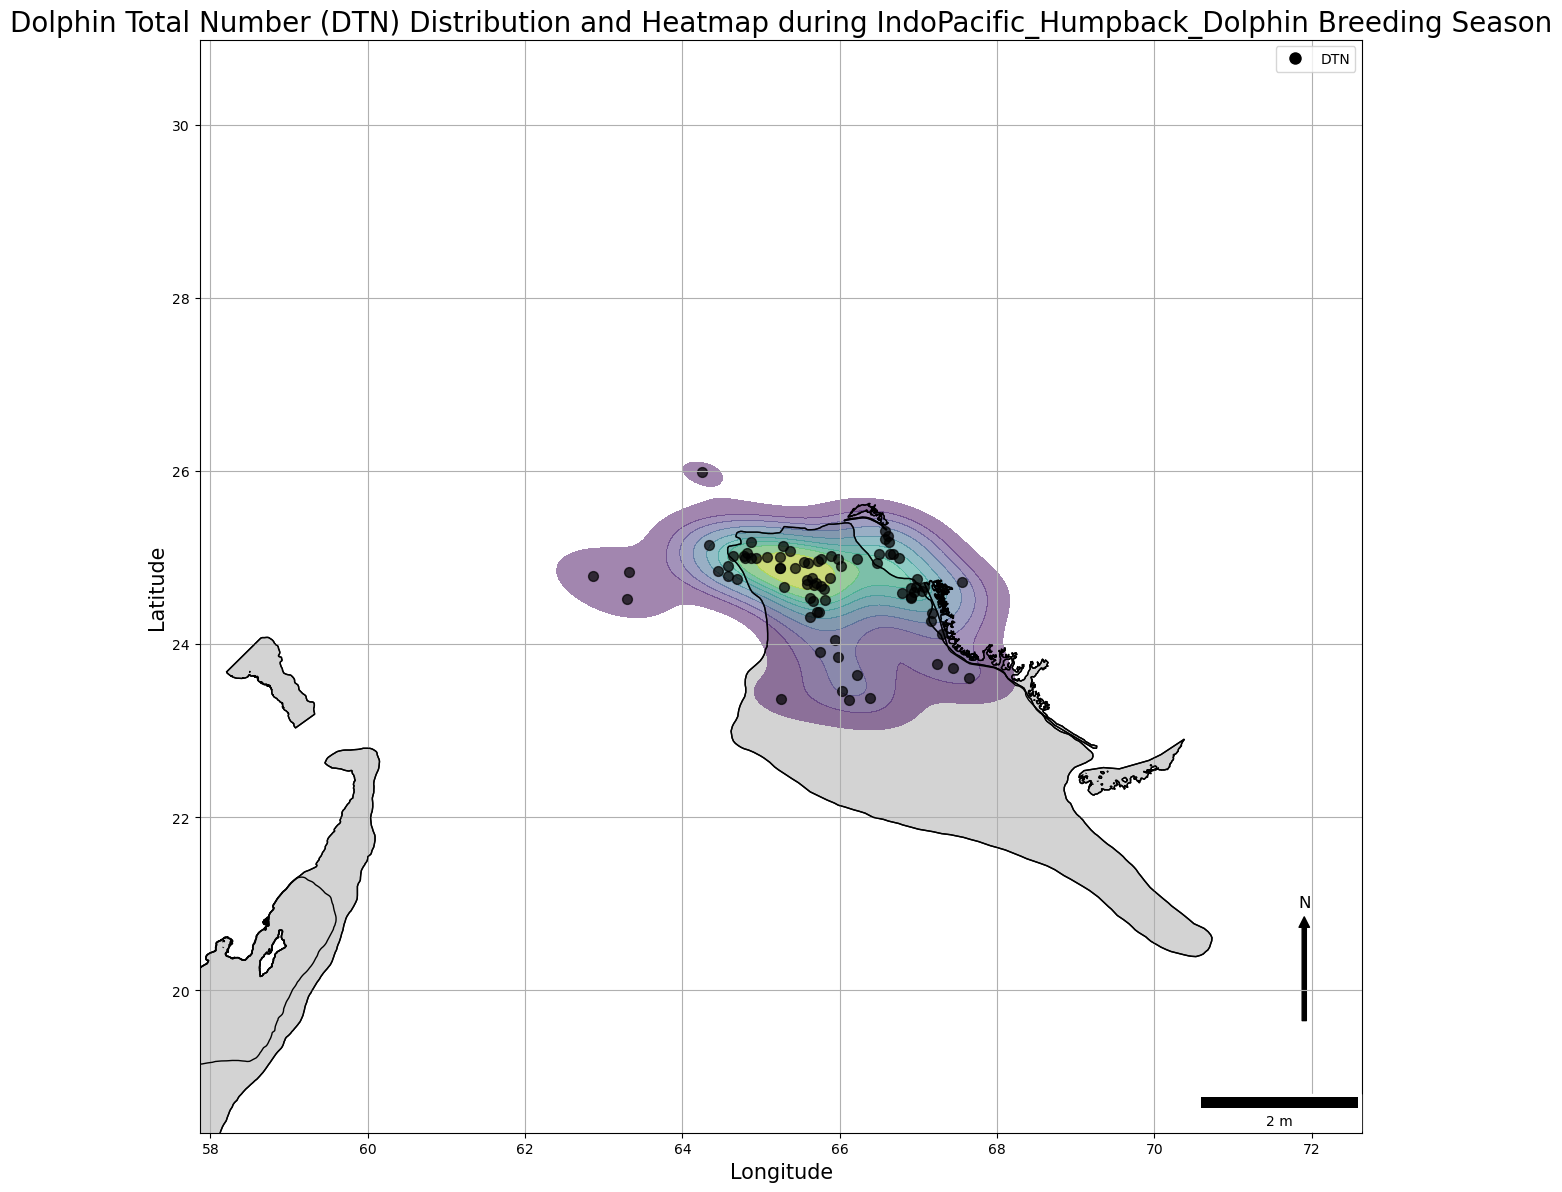

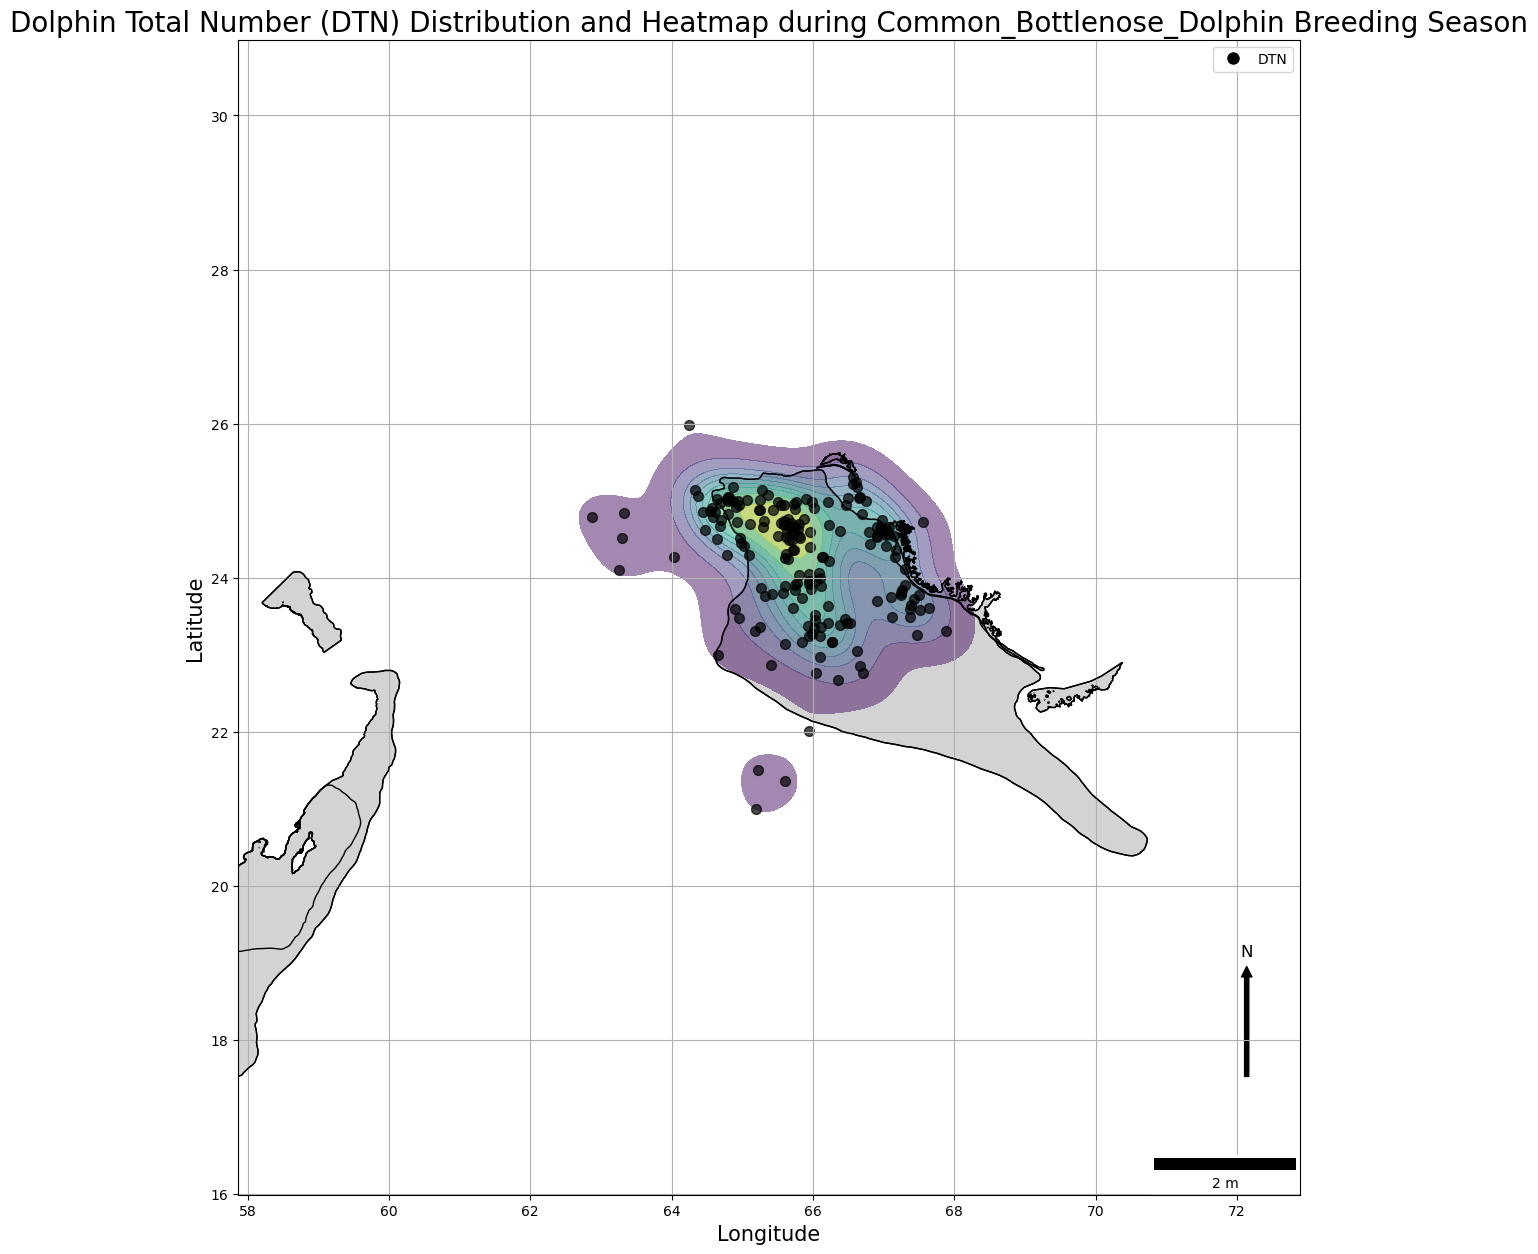

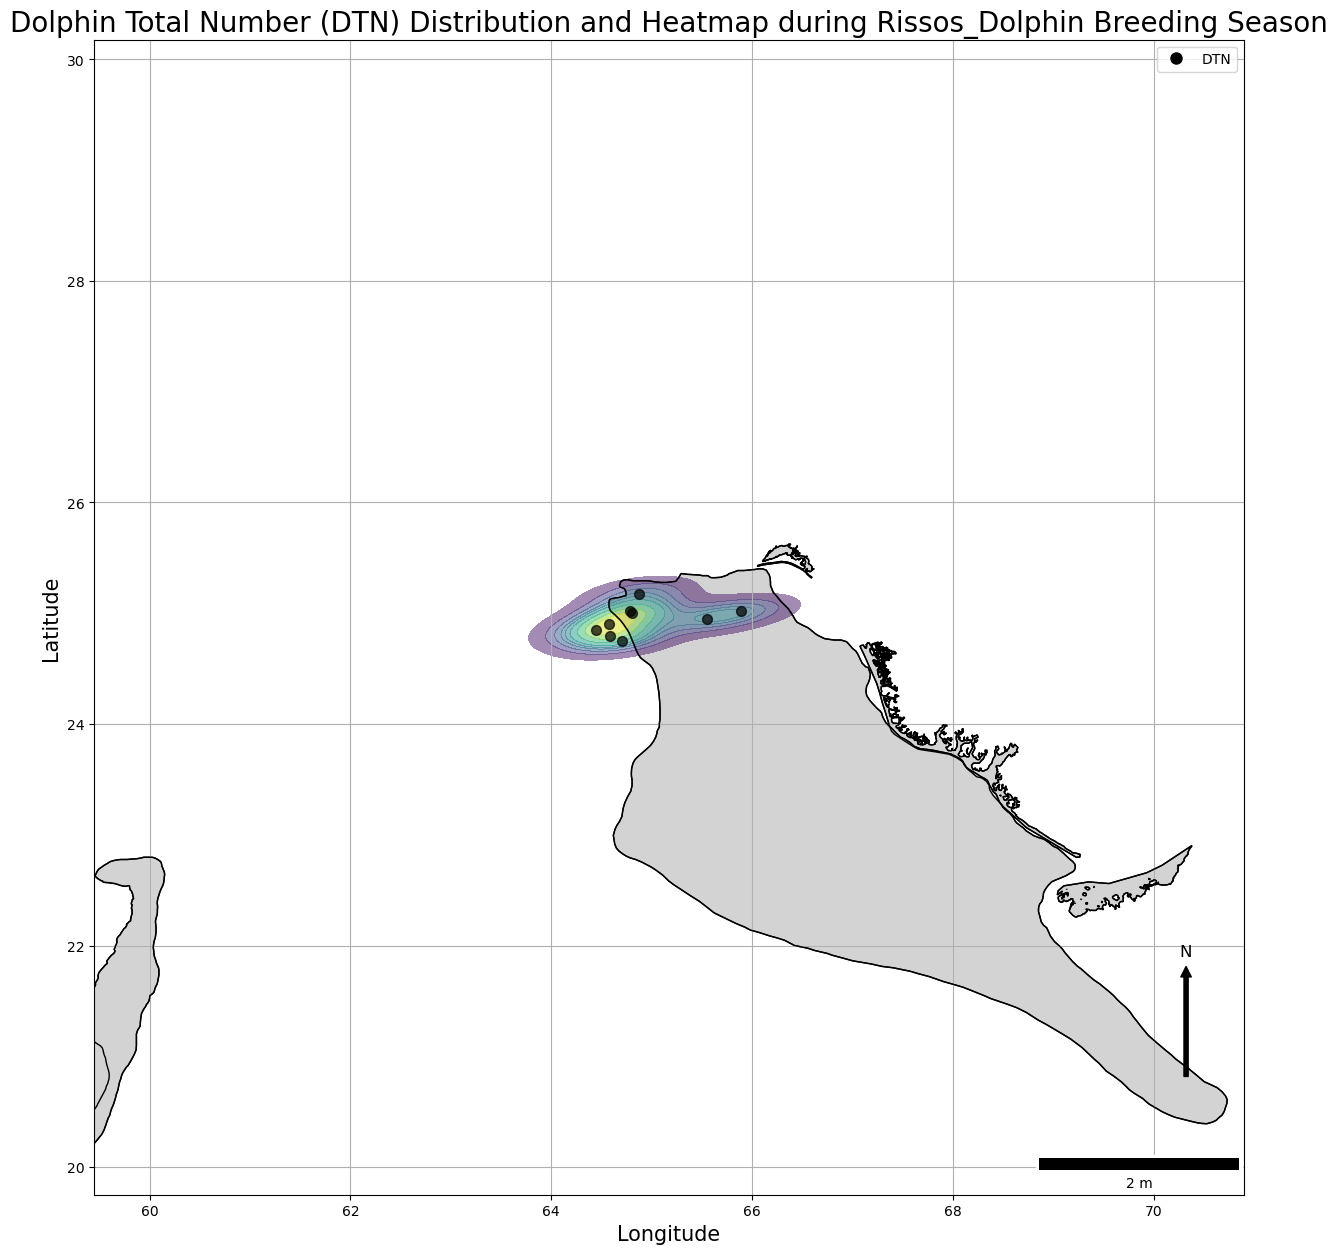

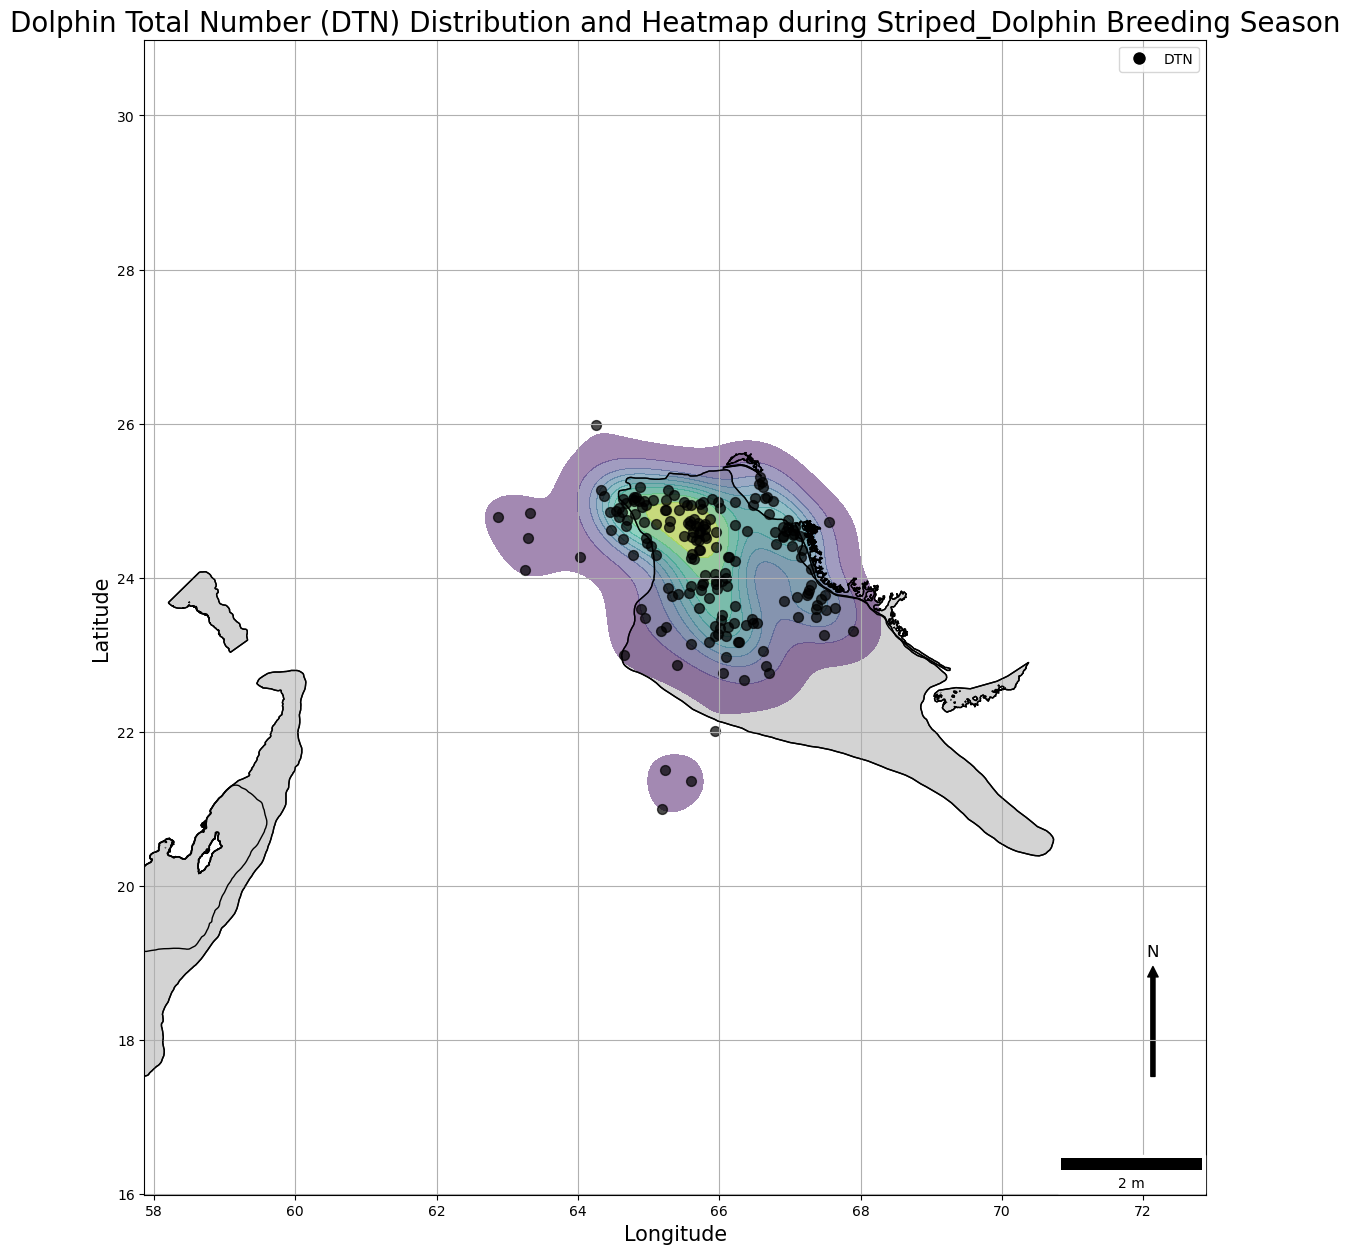

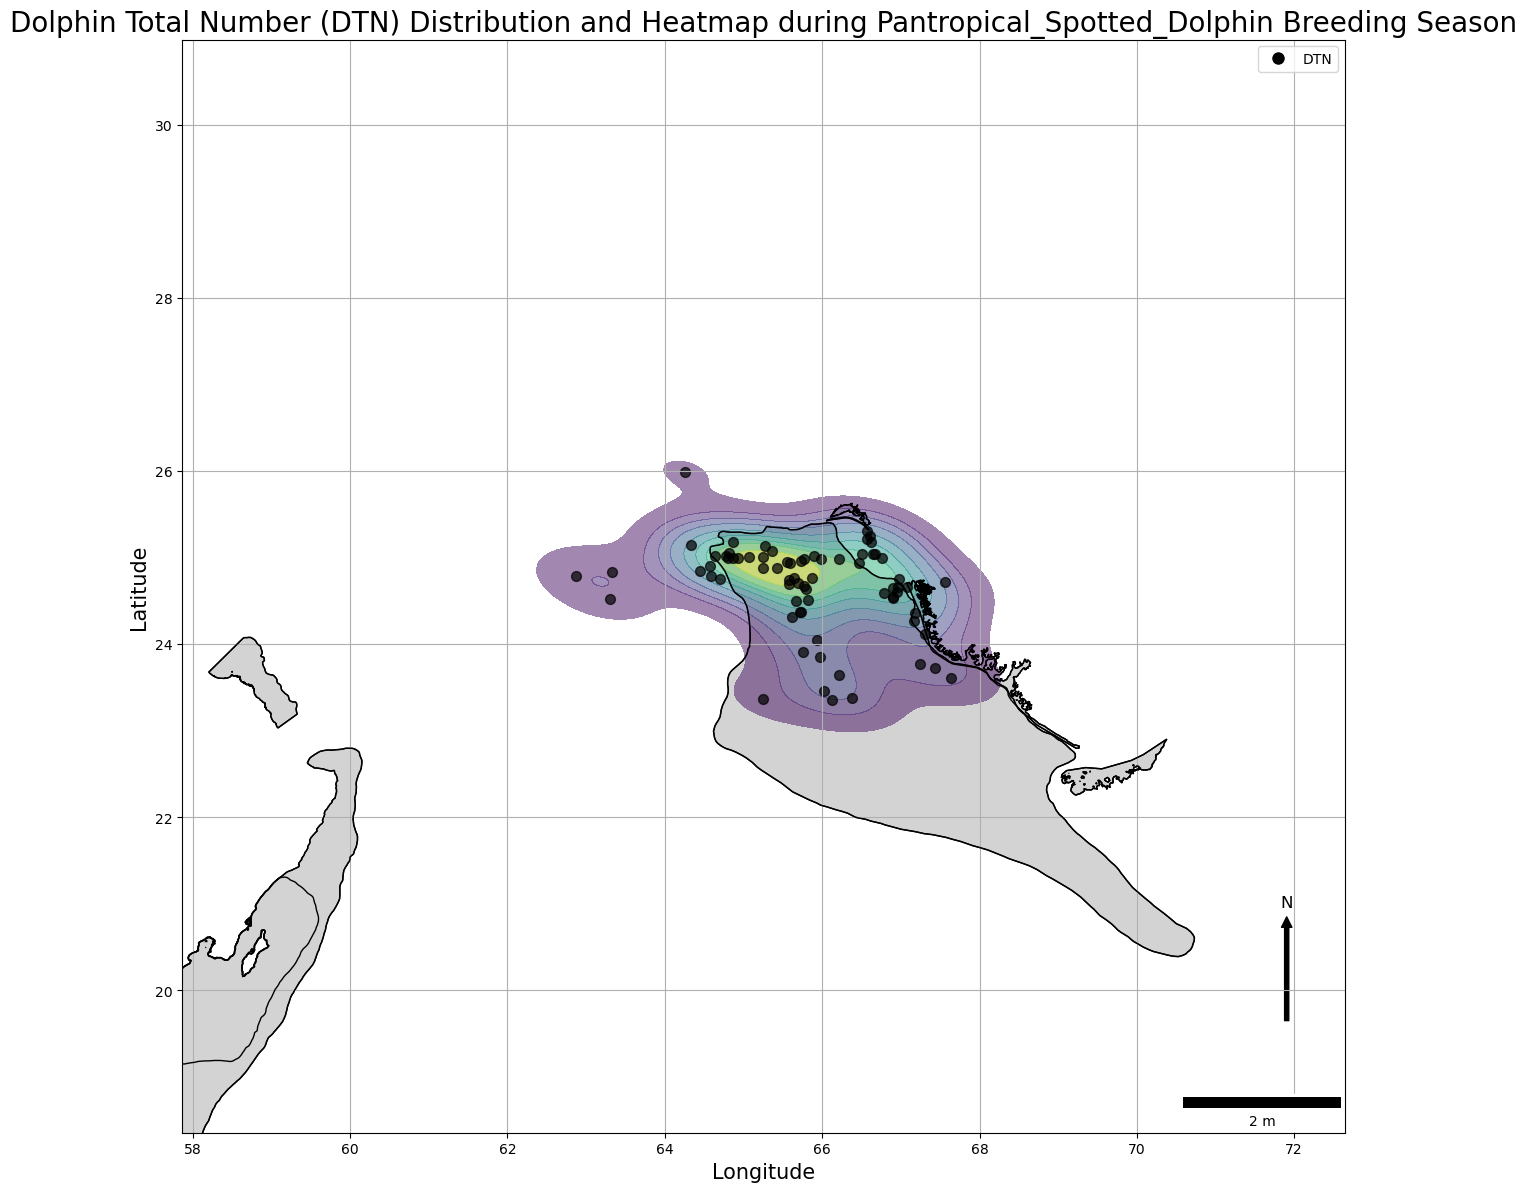

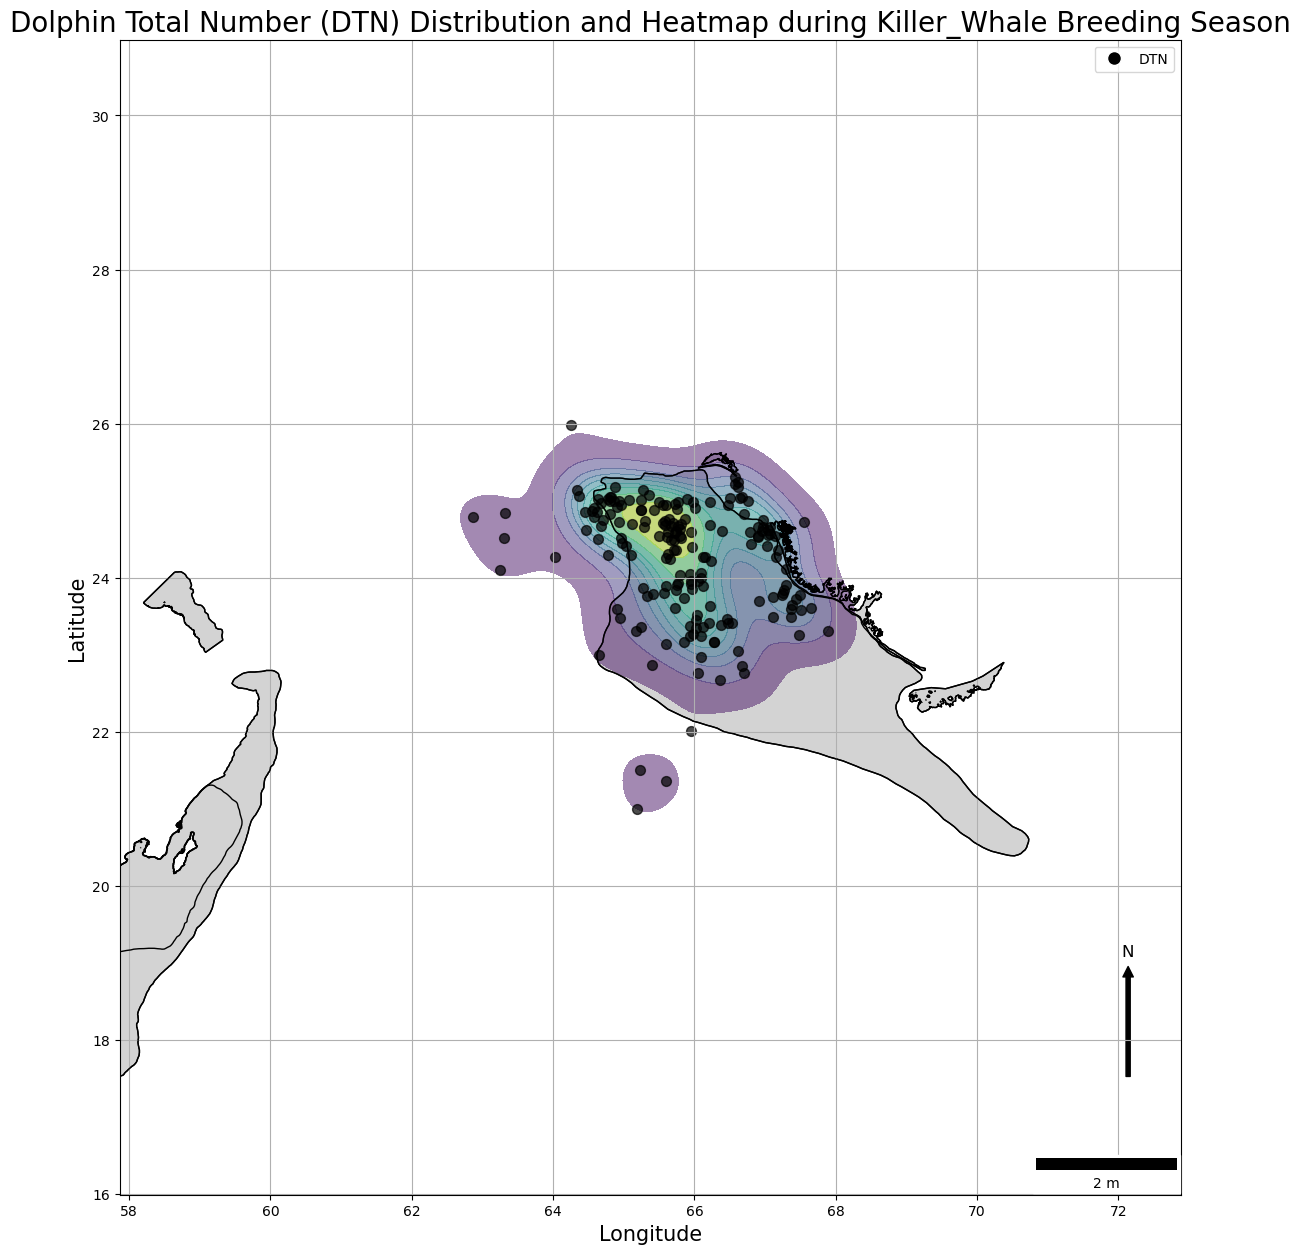

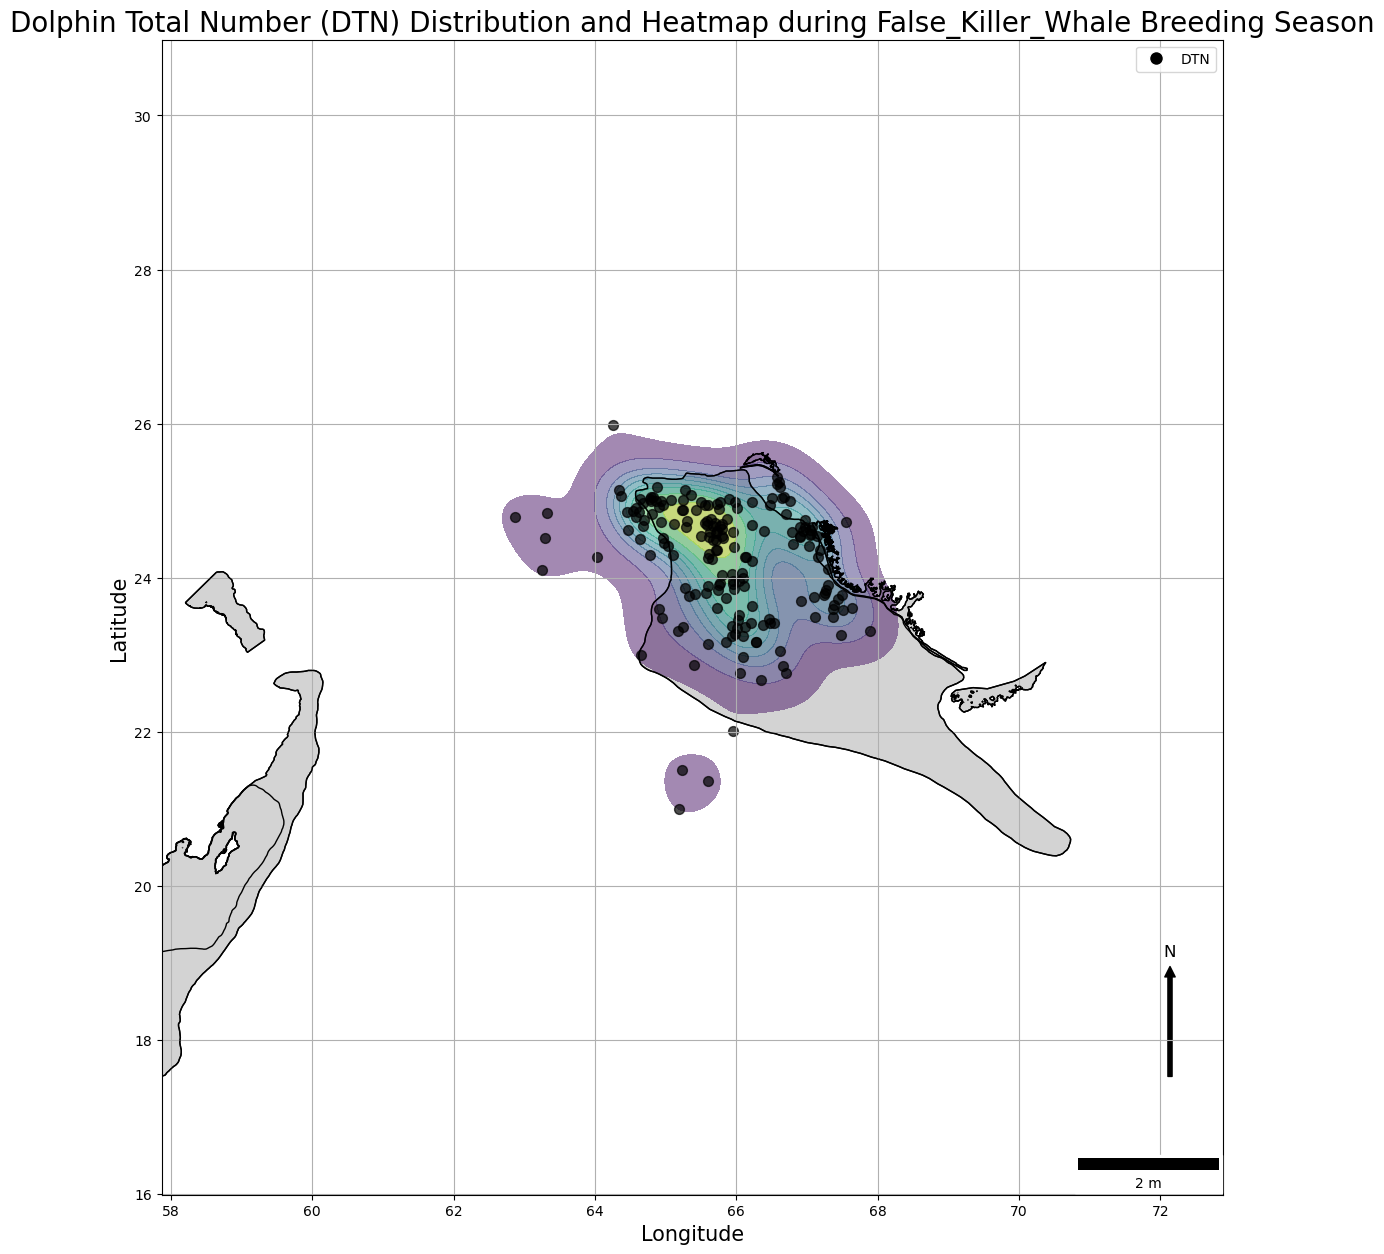

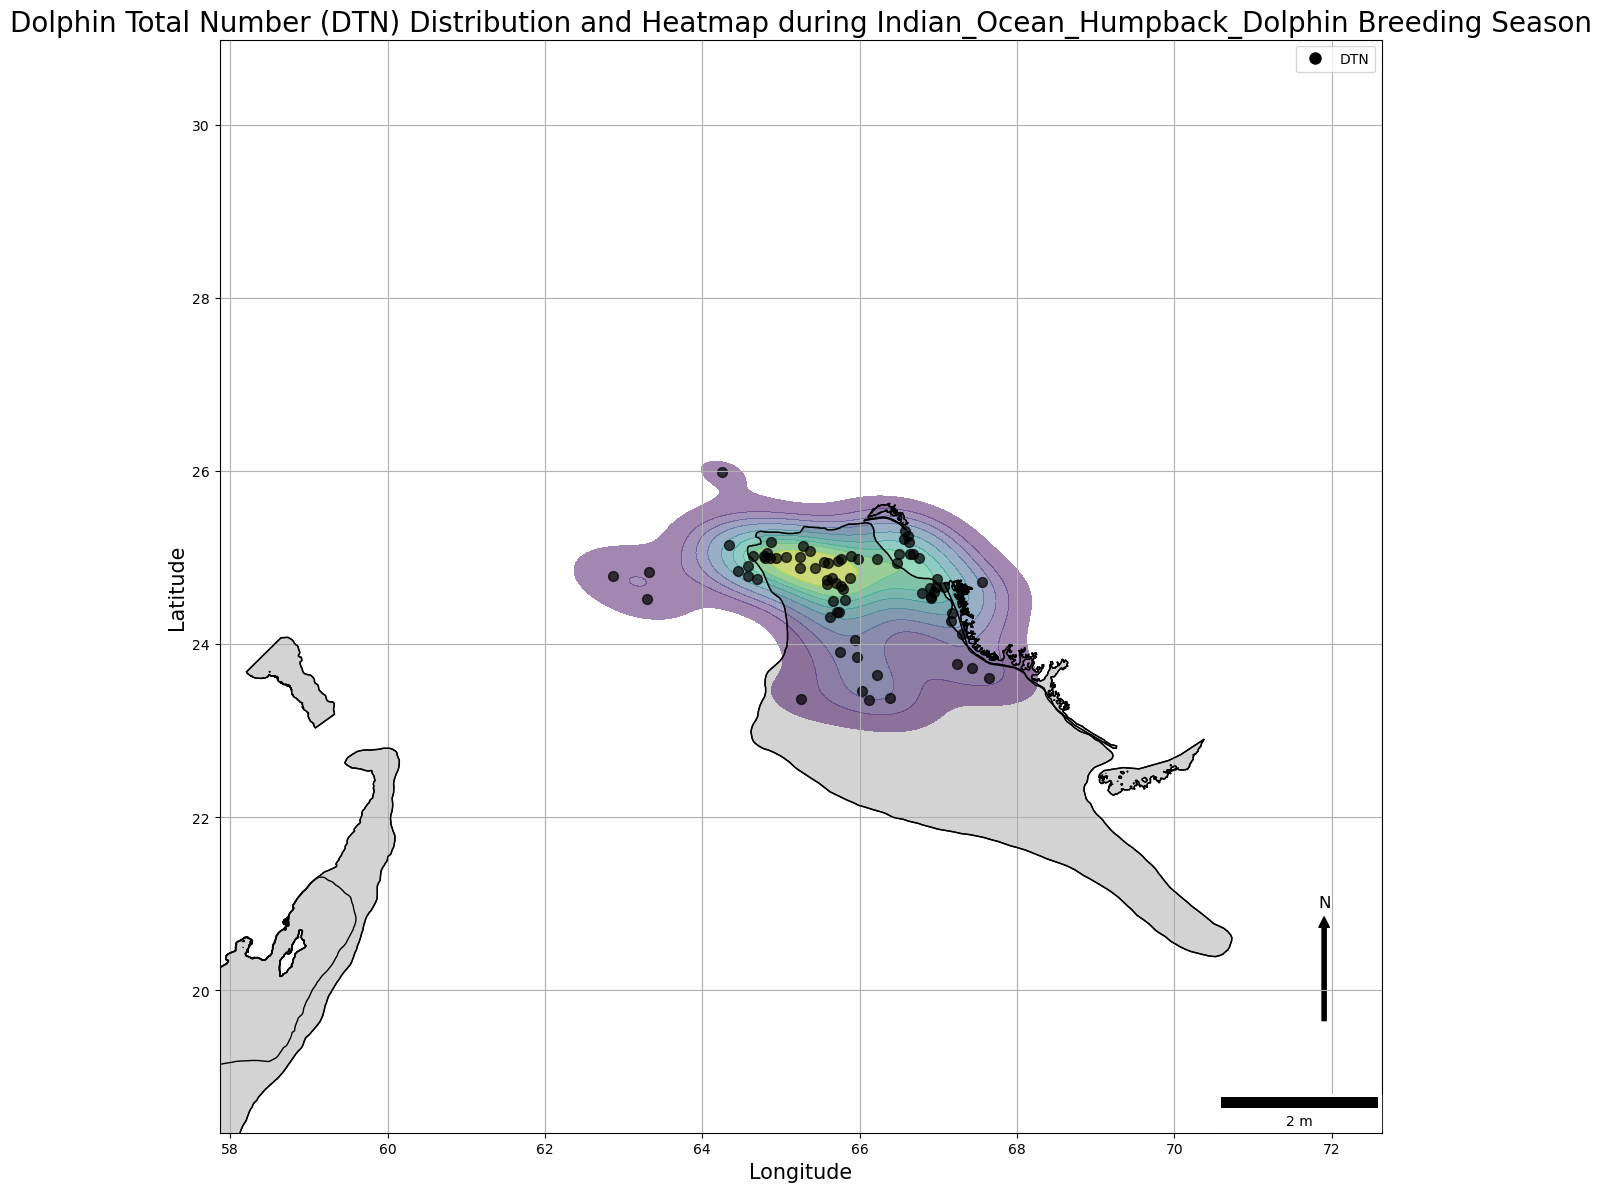

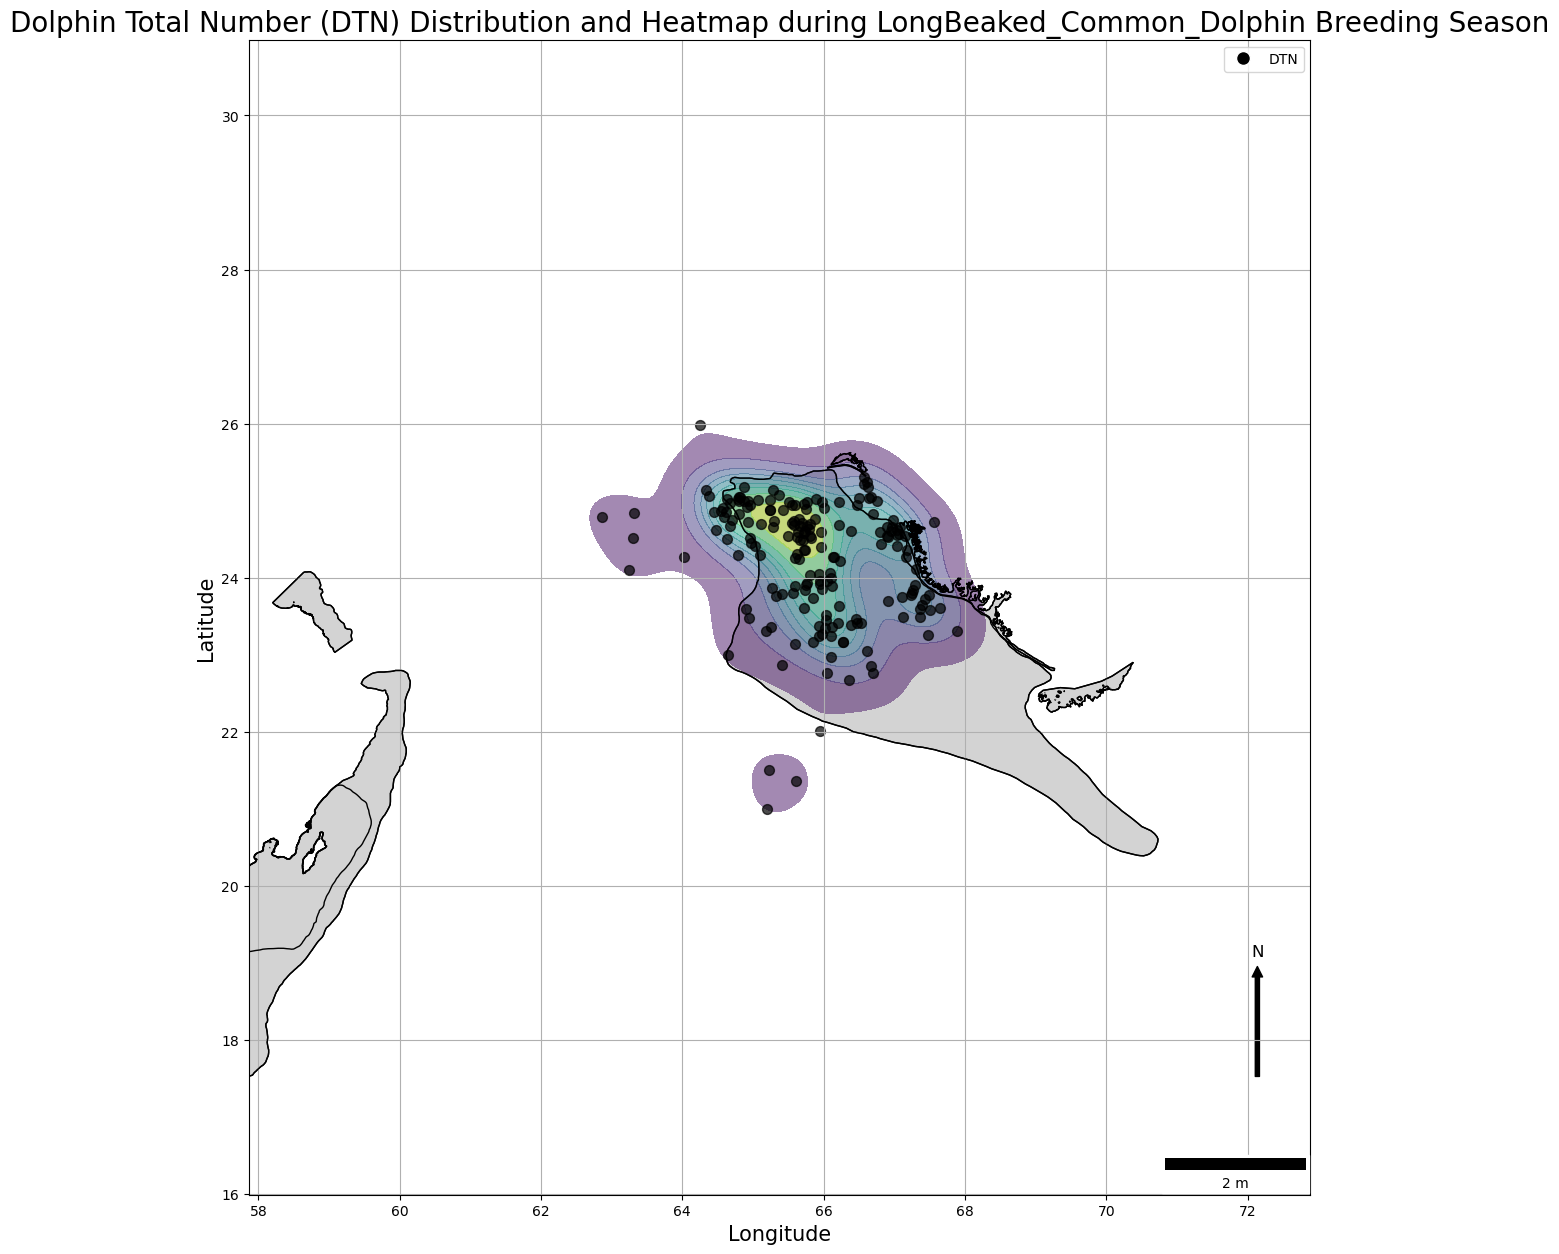

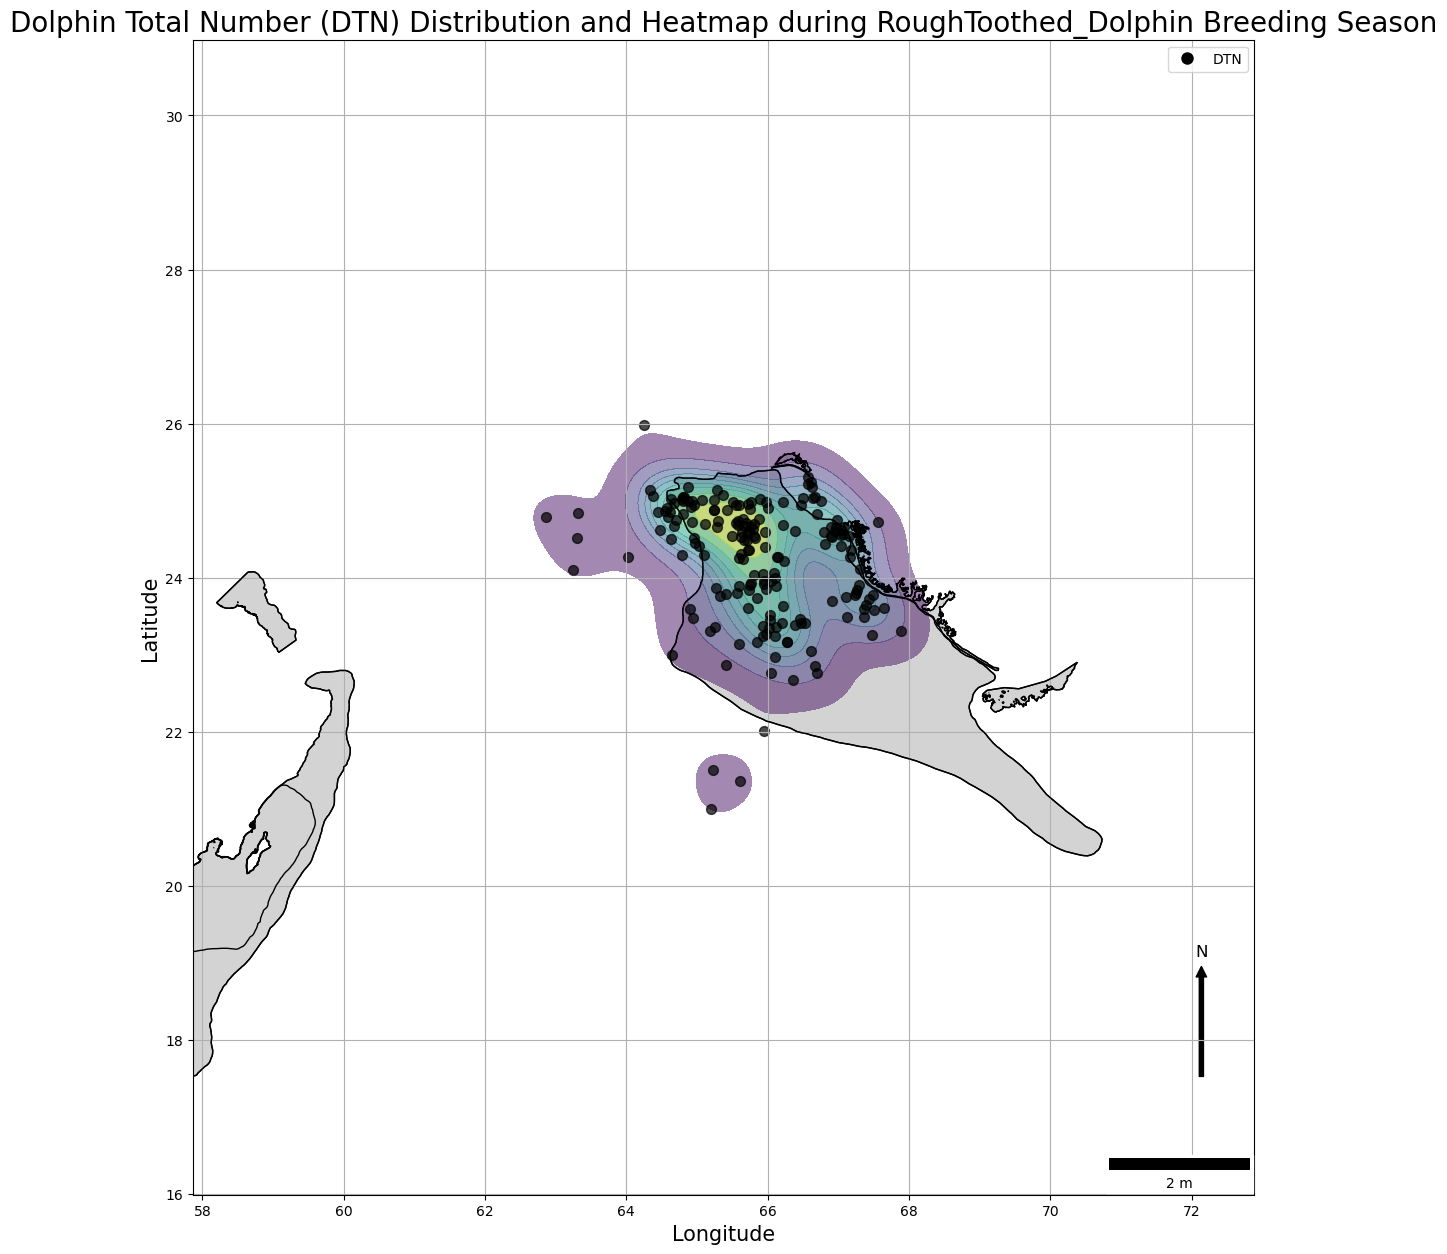

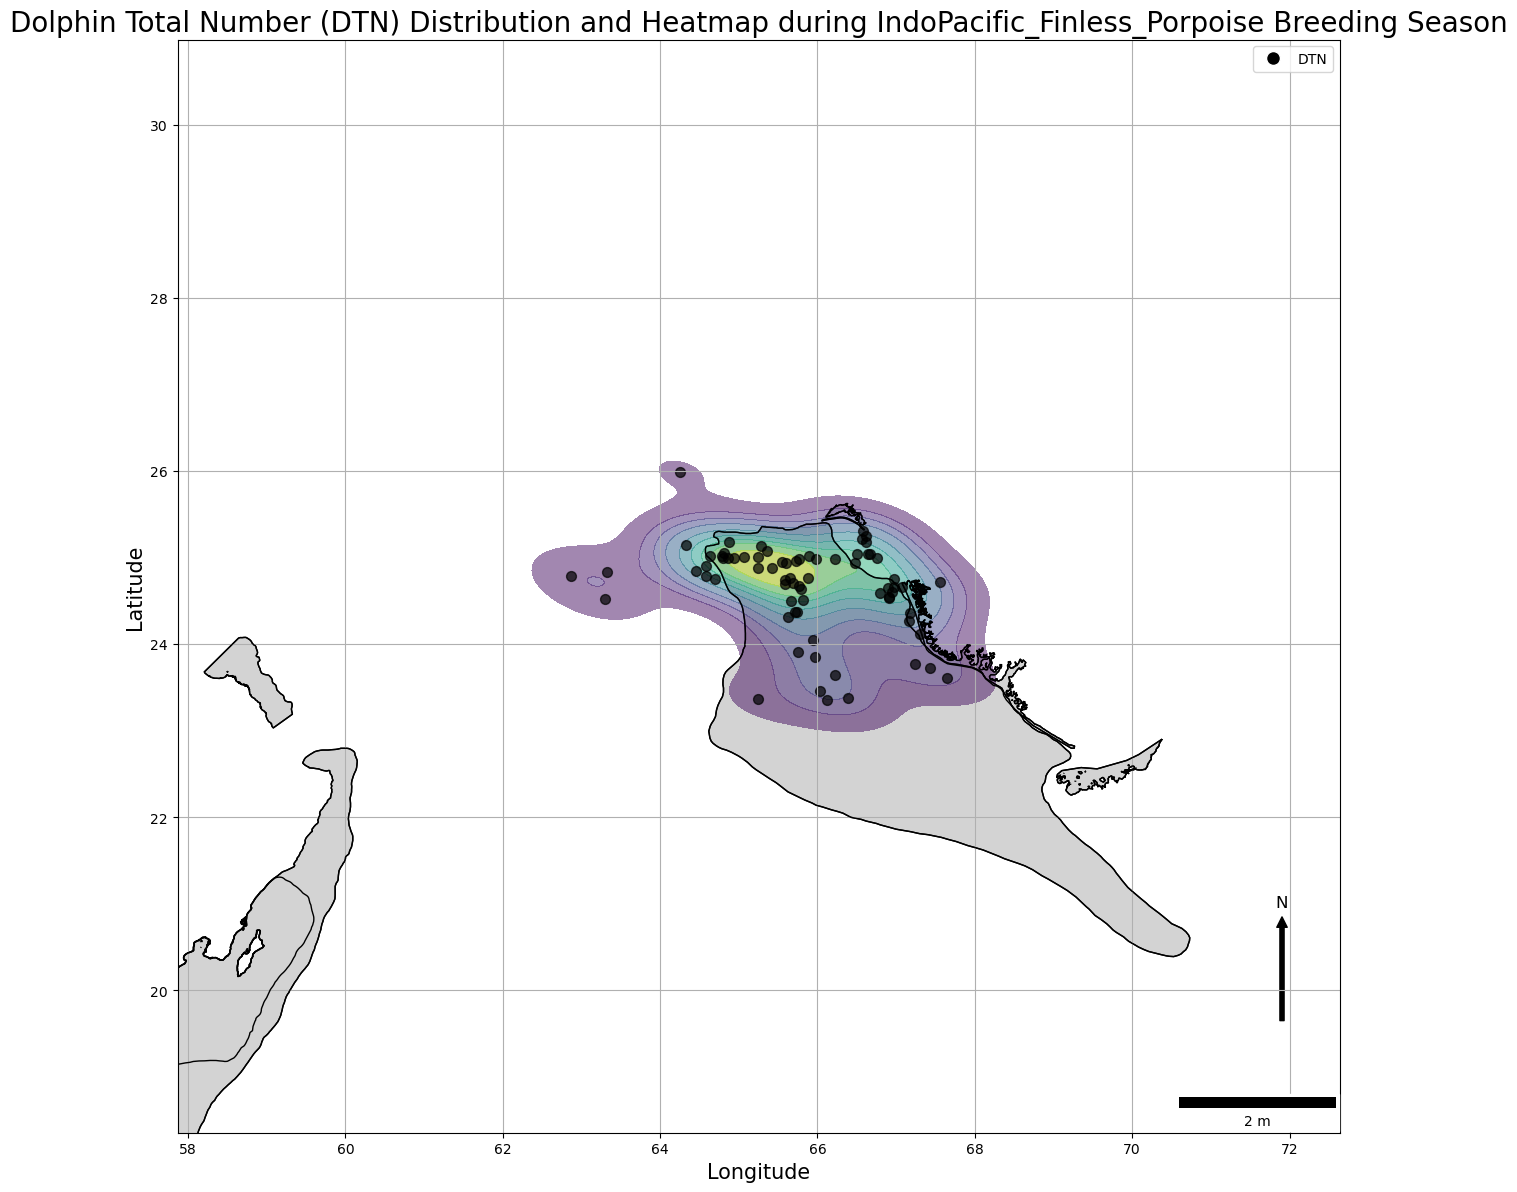

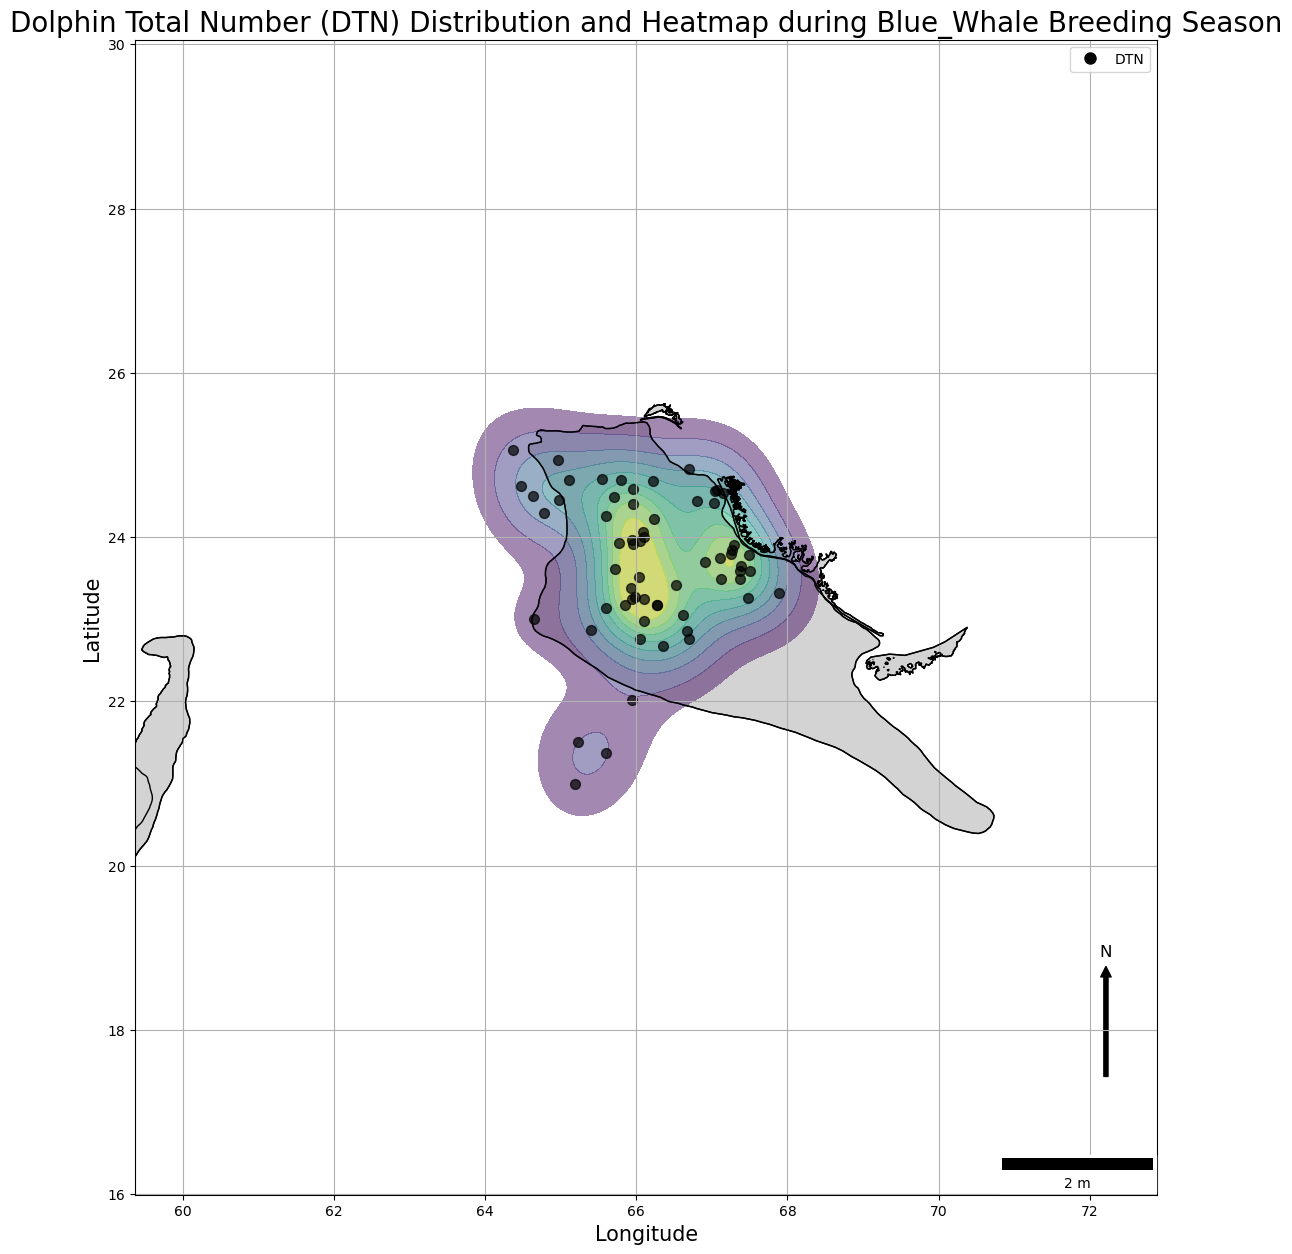

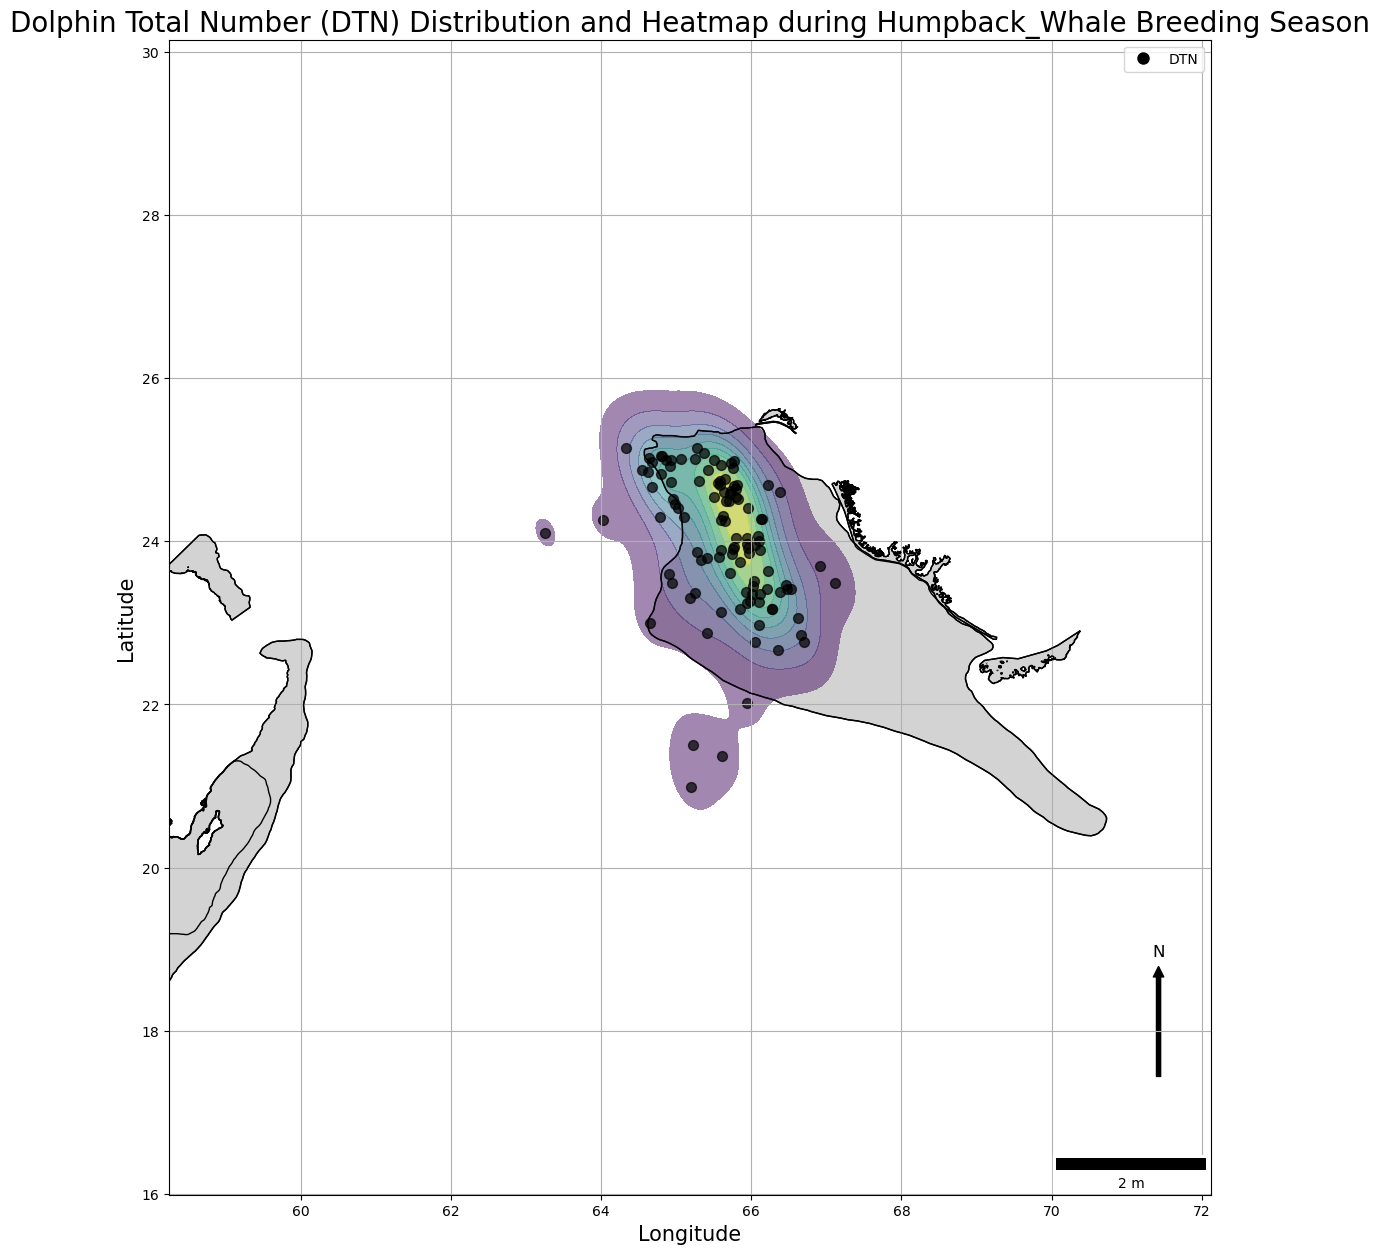

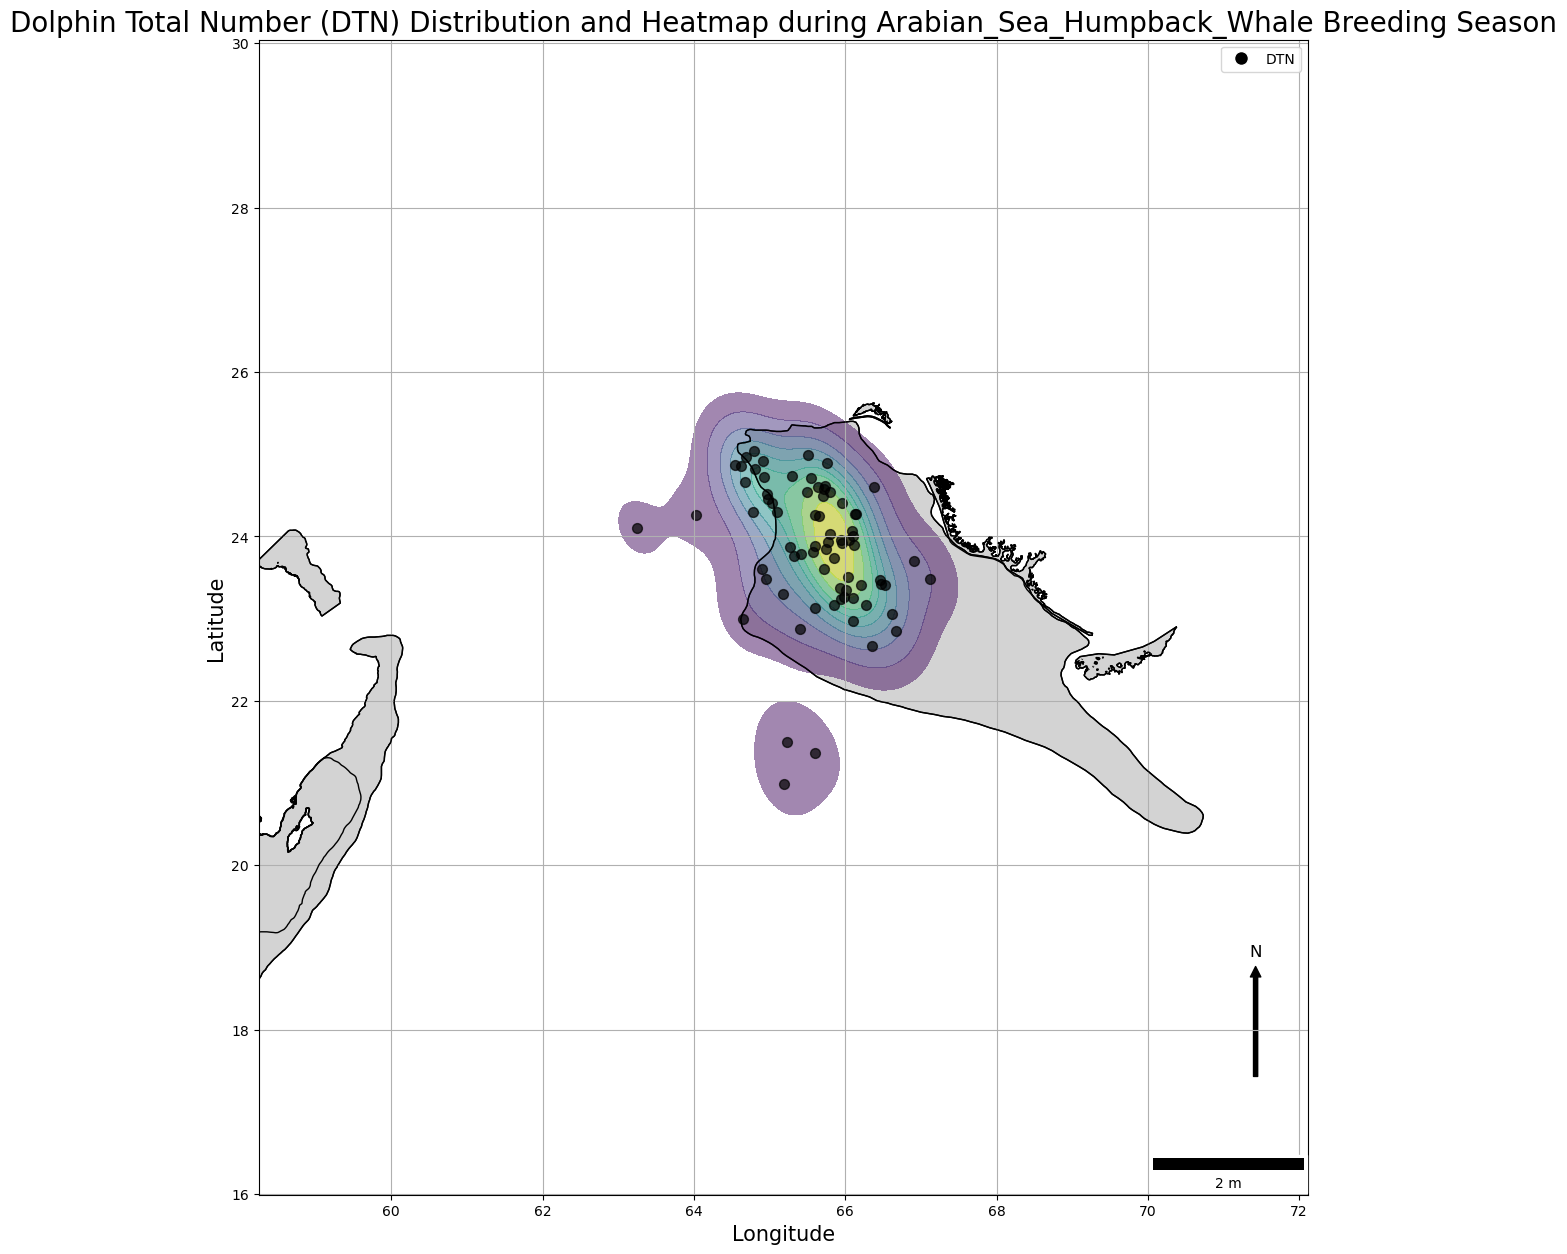

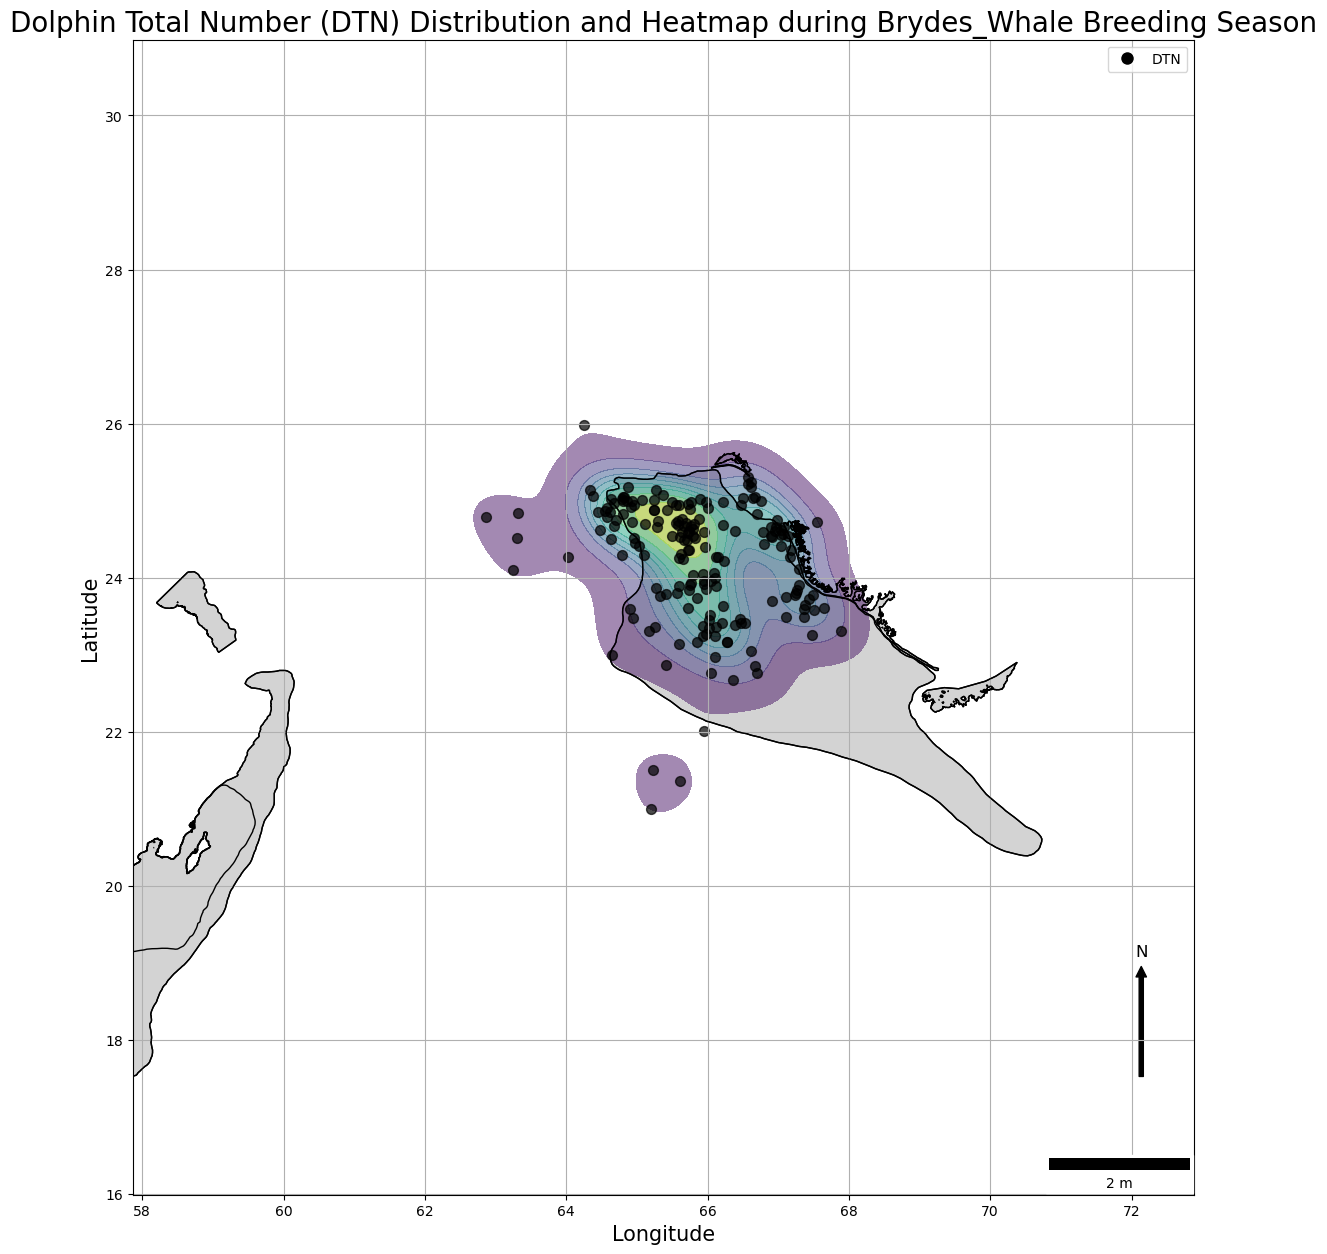

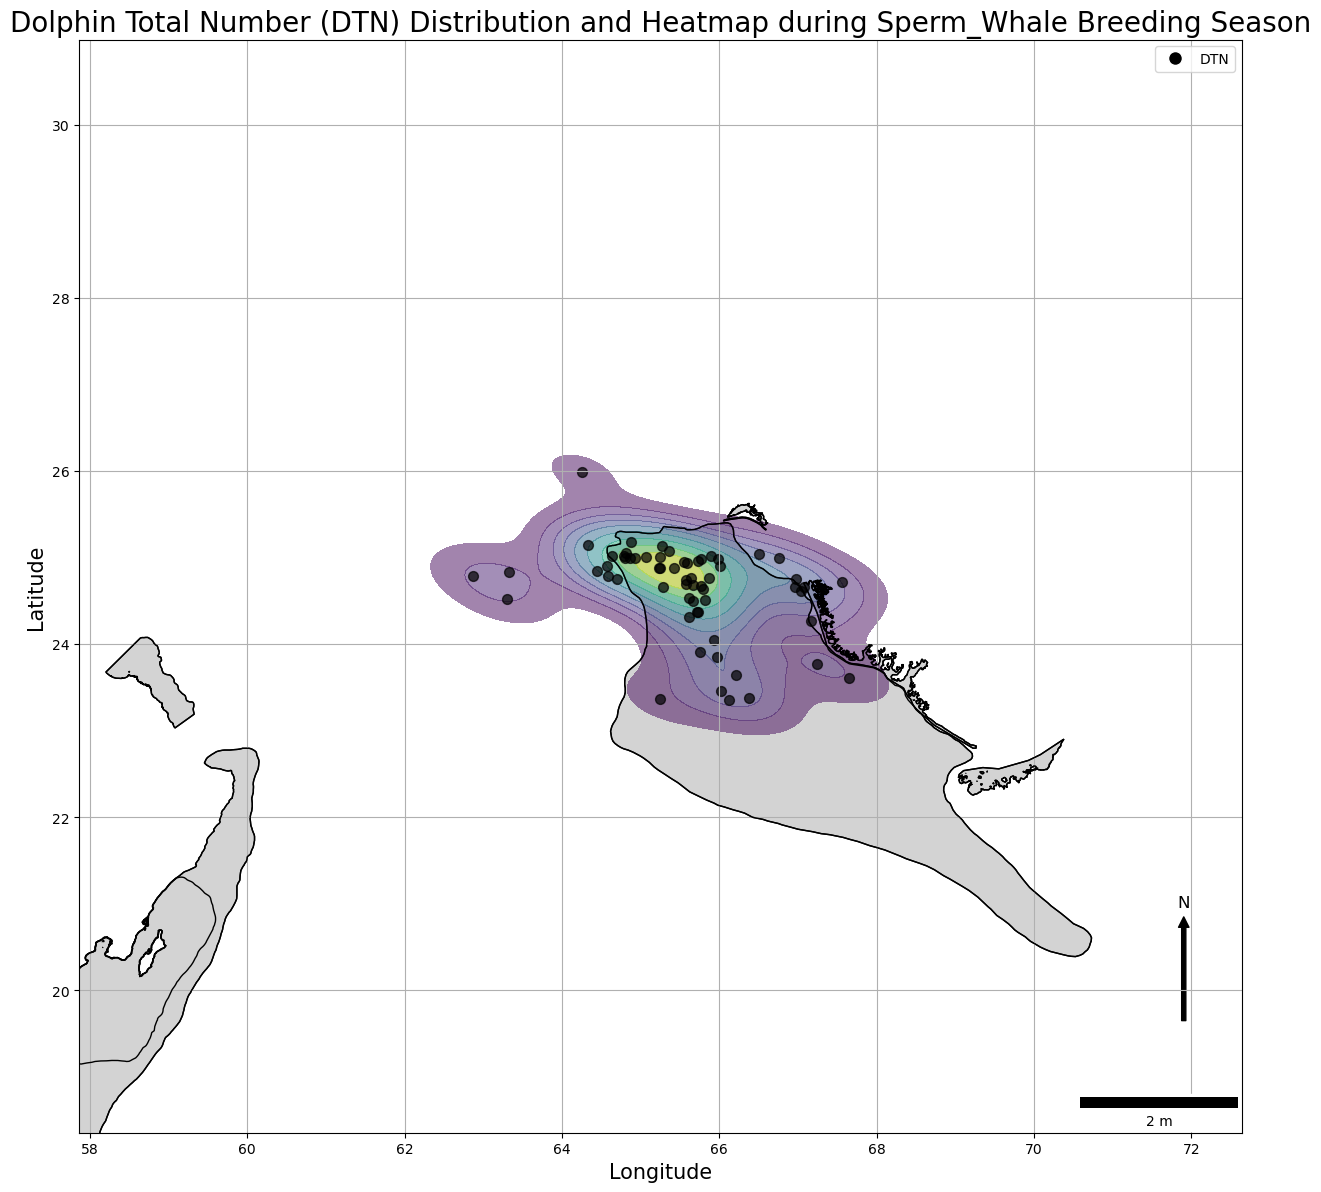

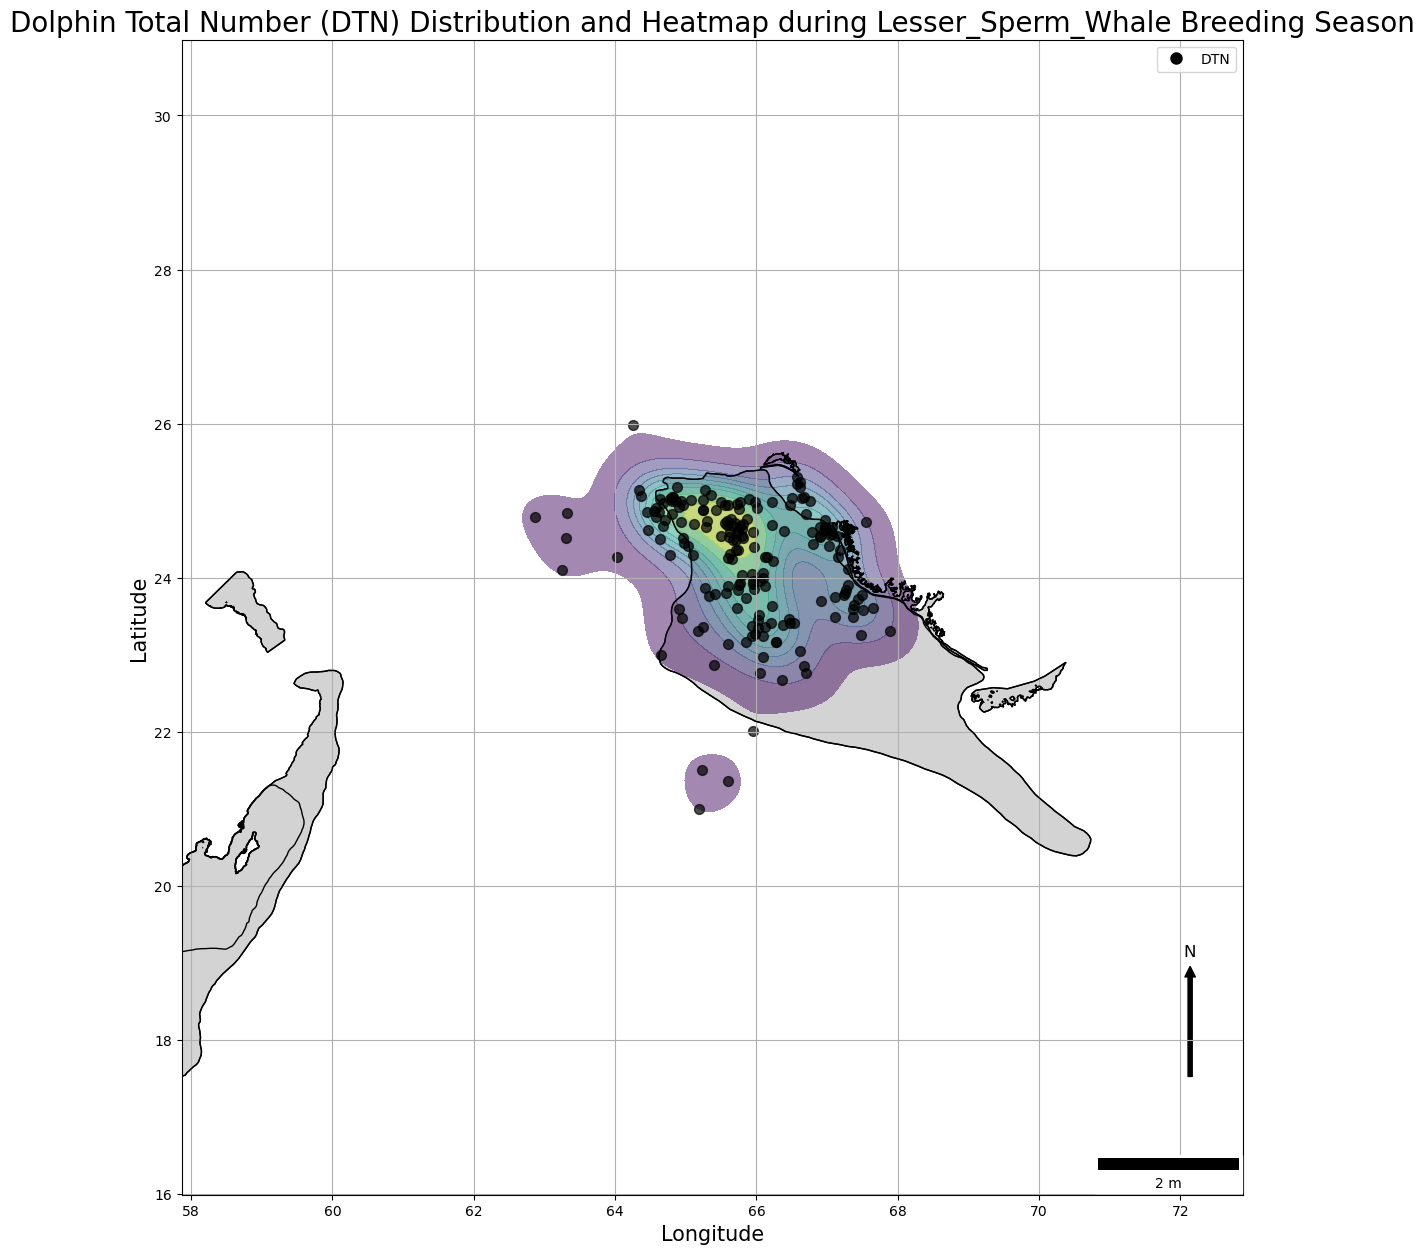

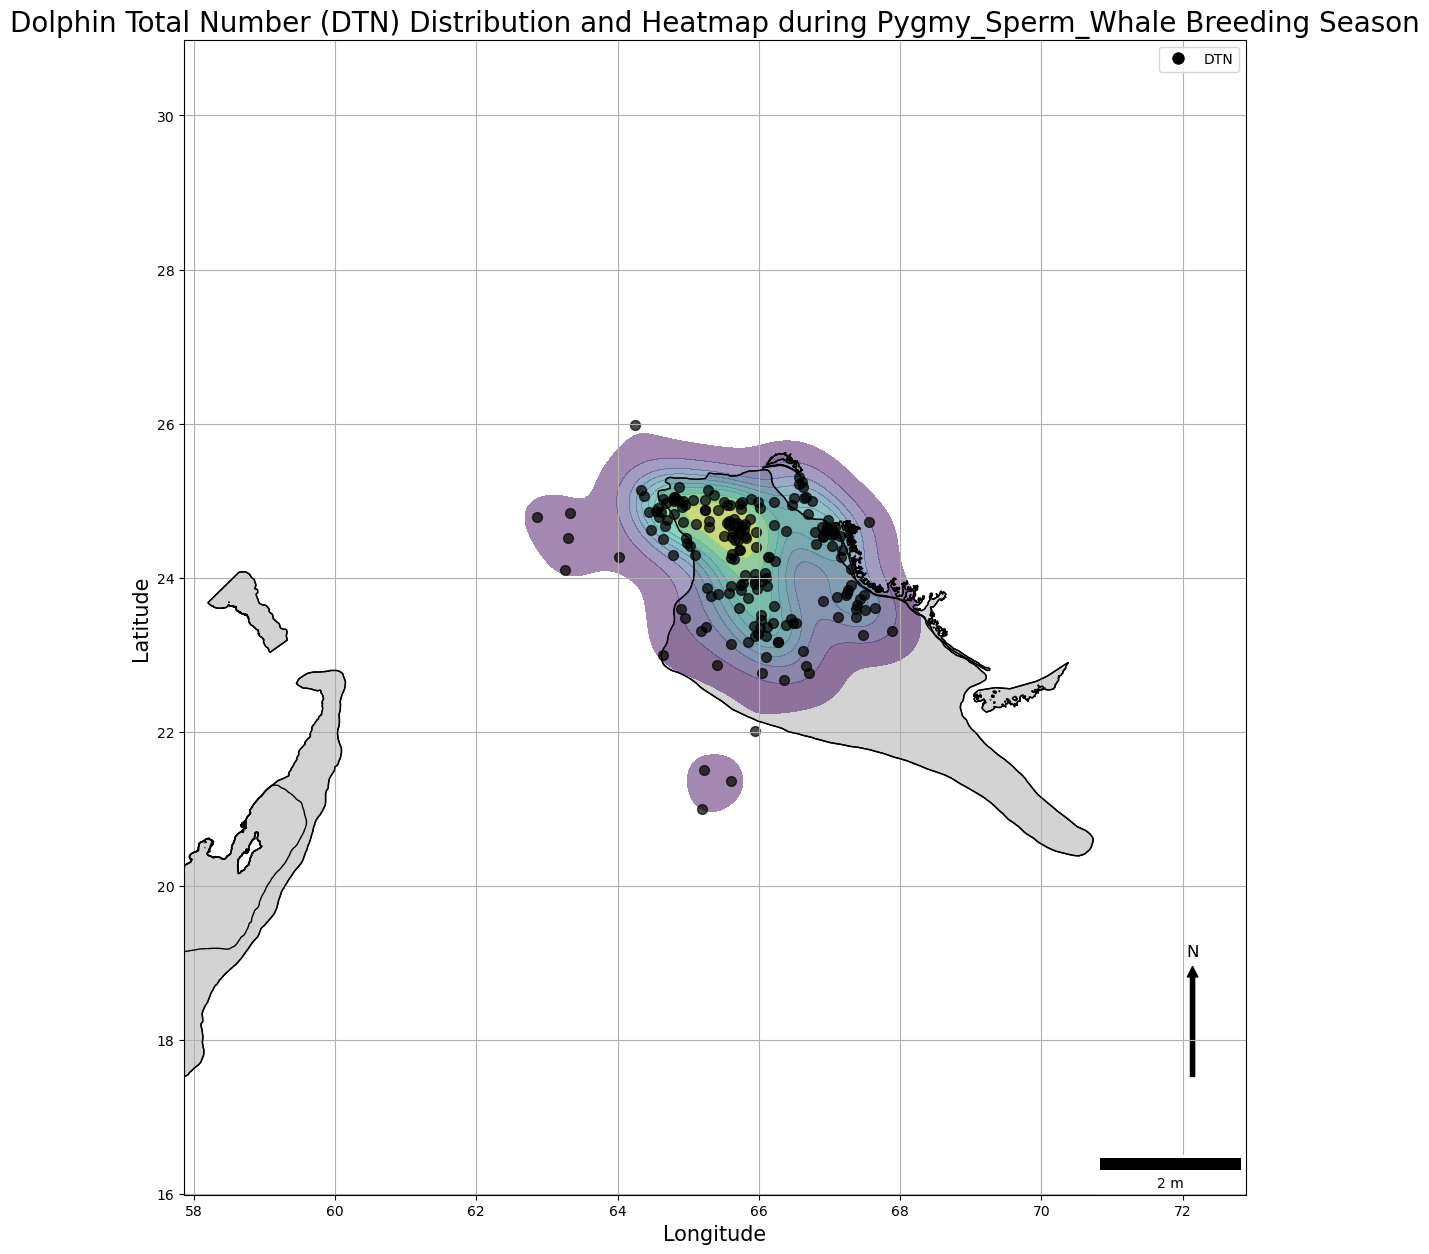

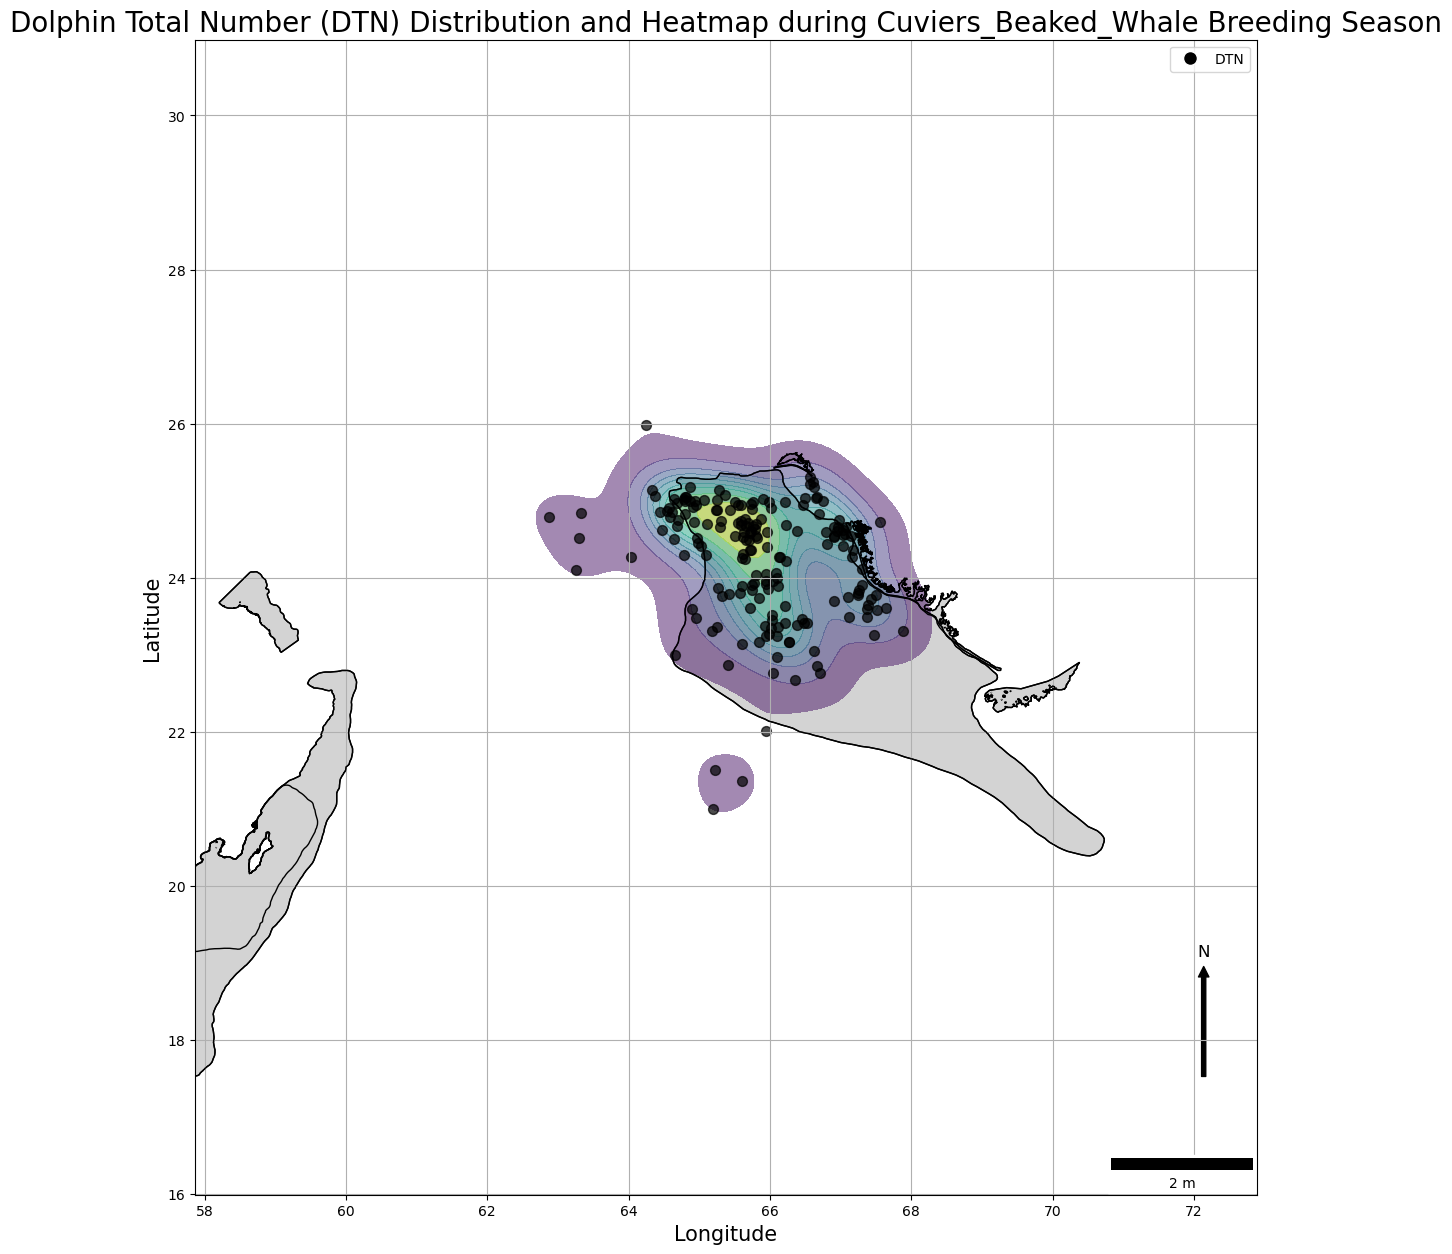

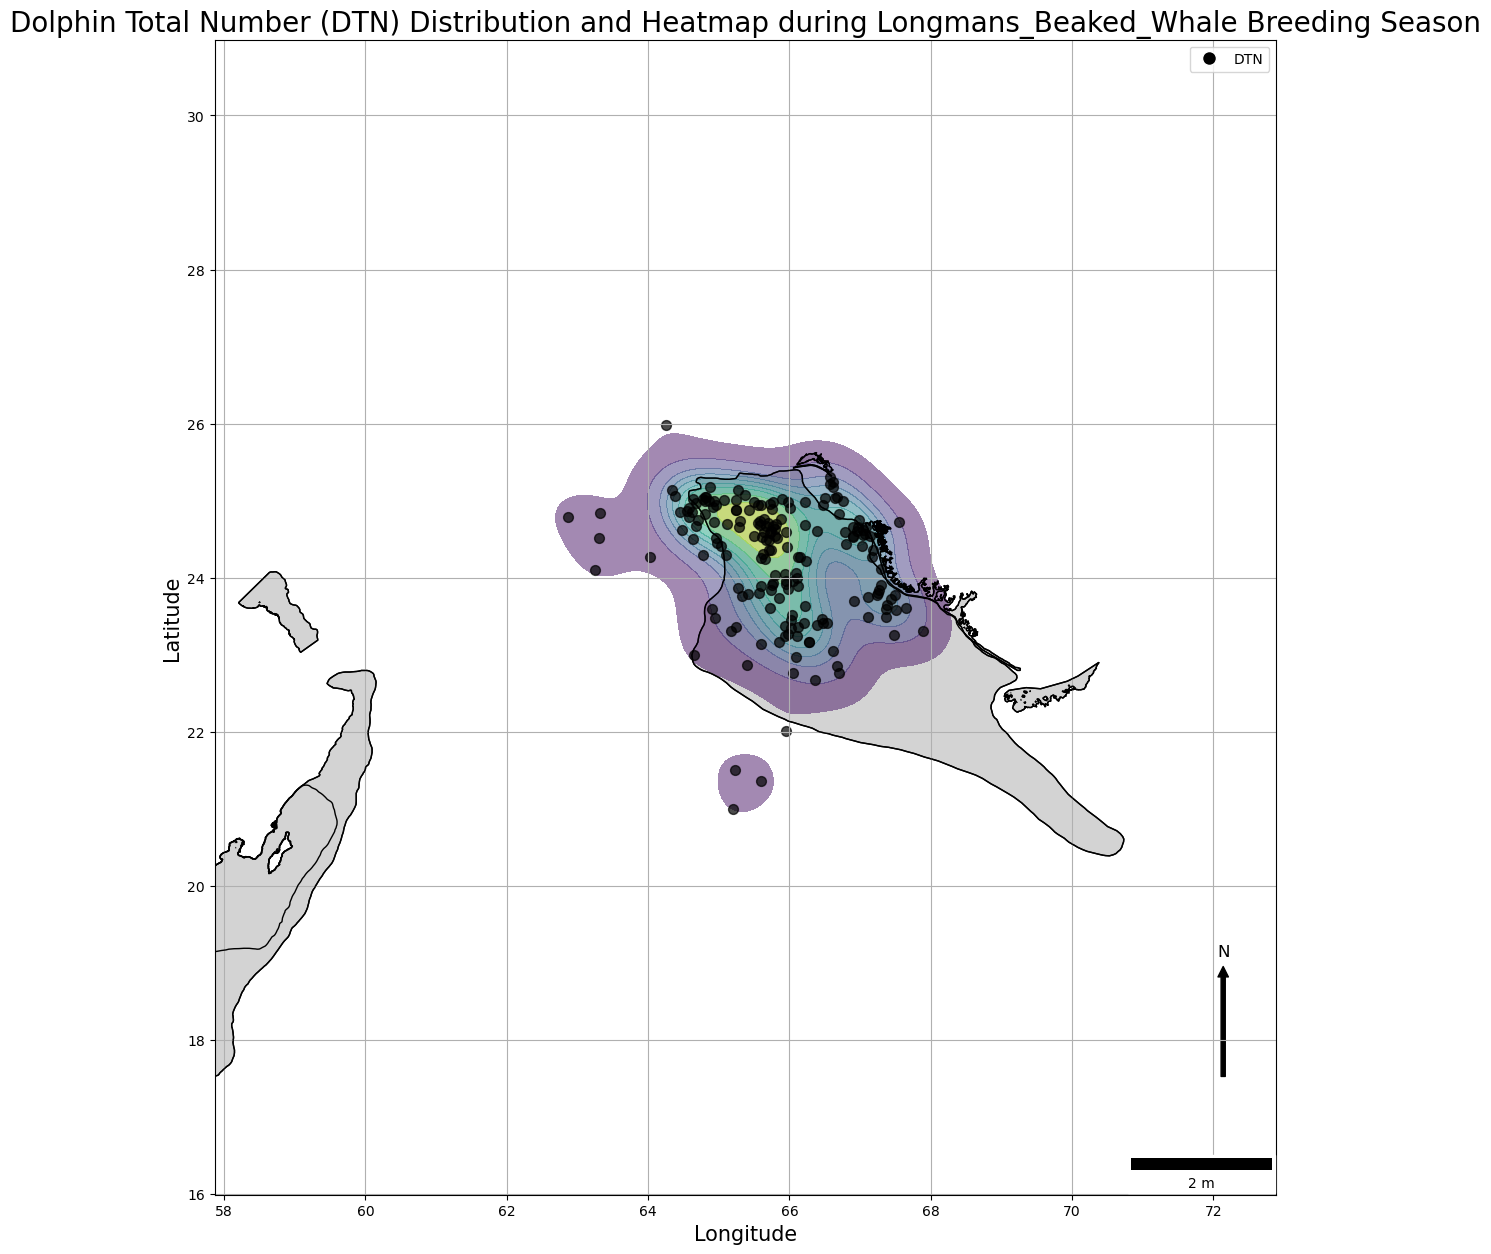

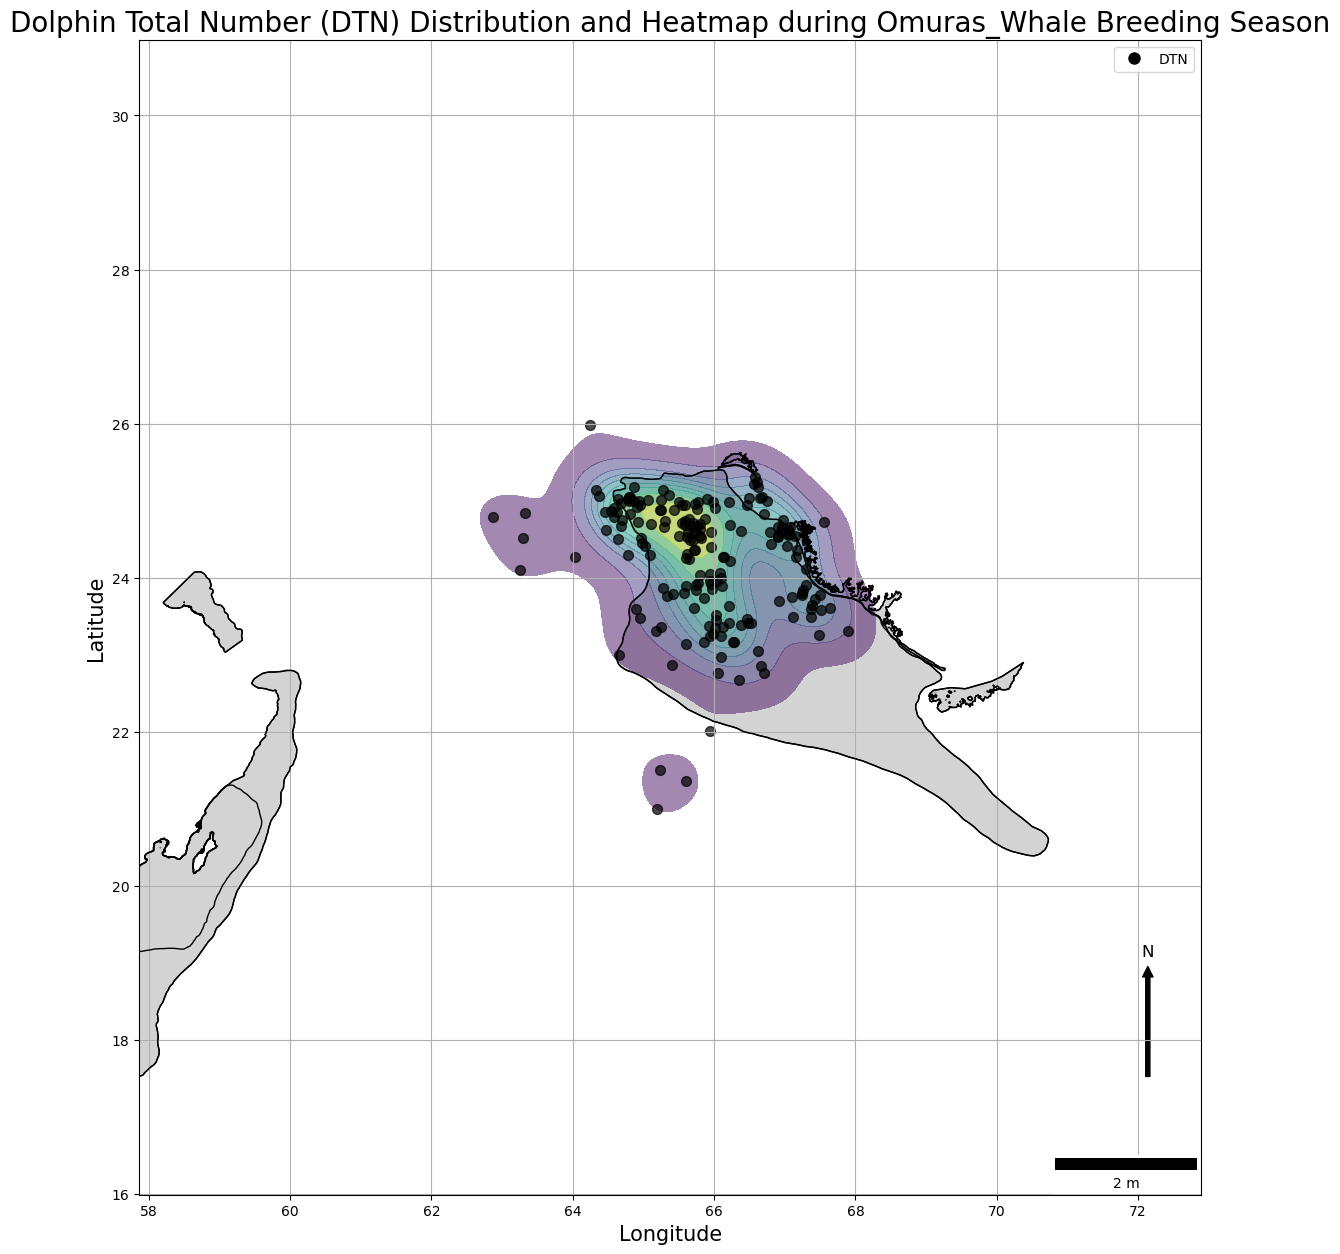

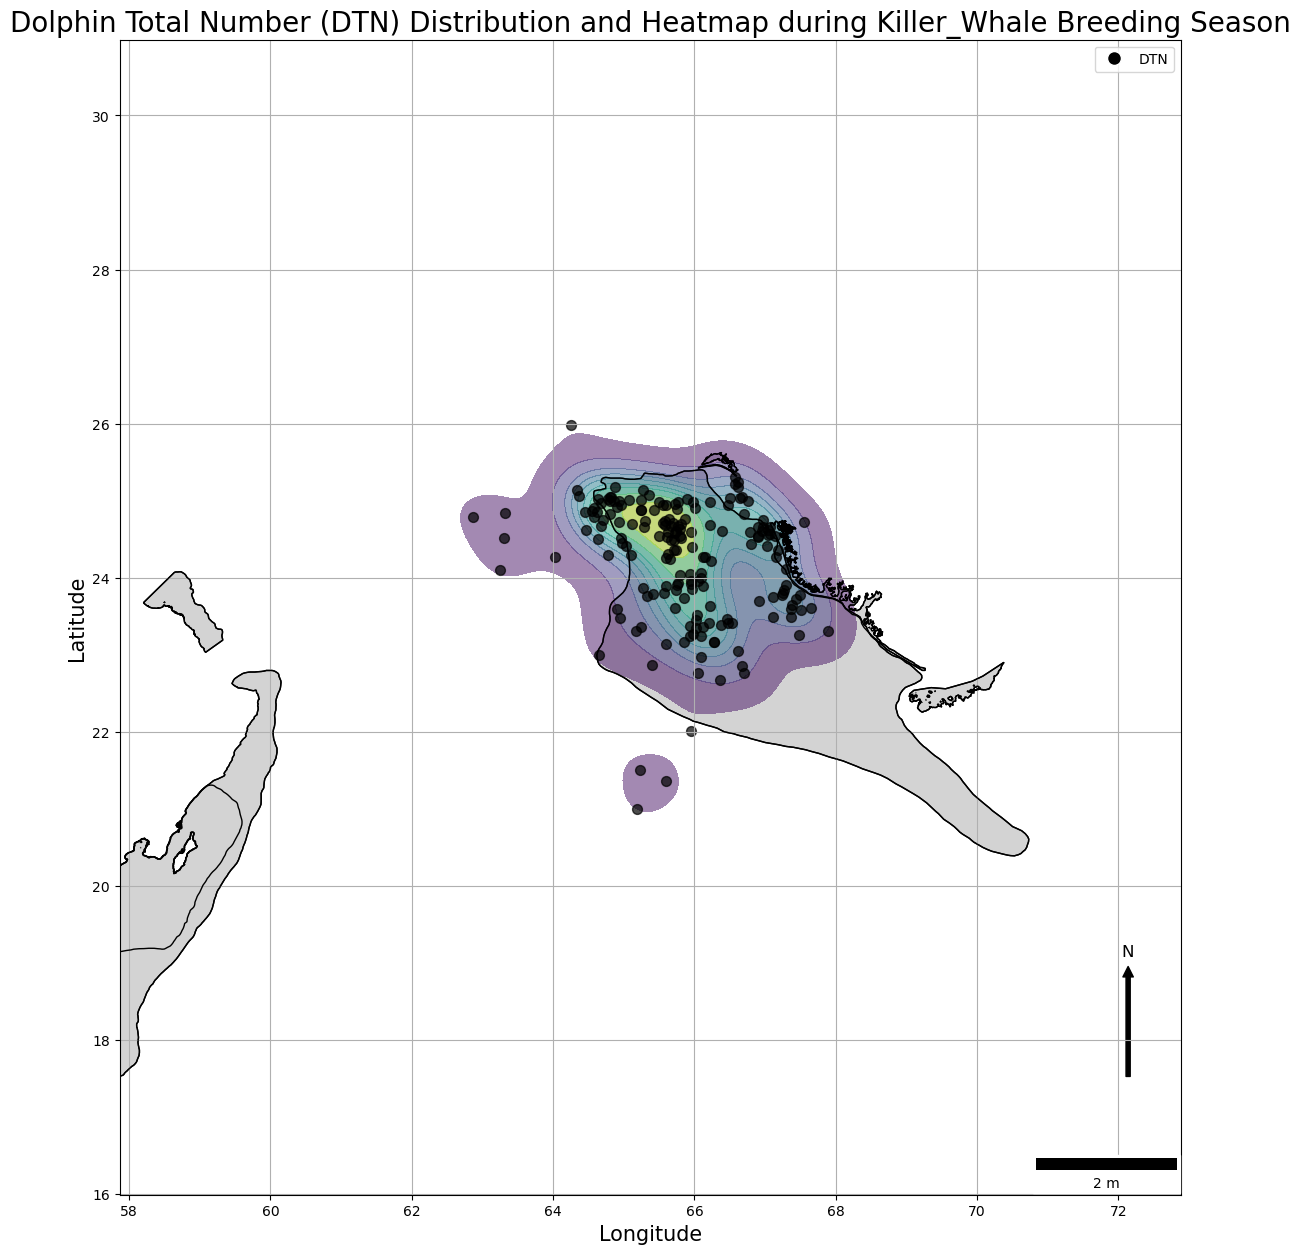

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyArrowPatch
from matplotlib.lines import Line2D
import matplotlib_scalebar.scalebar as sb

# Define the nesting and fishing seasons
nesting_season_months = [9, 10, 11, 12, 1, 2]
fishing_season_months = [8, 9, 10, 11, 12, 1, 2, 3, 4, 5]

# Define the breeding seasons for dolphins, porpoises, and whales in the Arabian Sea
dolphin_breeding_season_months = {
    "IndoPacific_Bottlenose_Dolphin": [4, 5, 9, 10],
    "Spinner_Dolphin": [4, 5, 9, 10],
    "IndoPacific_Humpback_Dolphin": [4, 5, 6, 7, 8, 9, 10],
    "Common_Bottlenose_Dolphin": list(range(1, 13)),
    "Rissos_Dolphin": [5, 6, 7],
    "Striped_Dolphin": list(range(1, 13)),
    "Pantropical_Spotted_Dolphin": [4, 5, 9, 10],
    "Killer_Whale": list(range(1, 13)),
    "False_Killer_Whale": list(range(1, 13)),
    "Indian_Ocean_Humpback_Dolphin": [4, 5, 9, 10],
    "LongBeaked_Common_Dolphin": list(range(1, 13)),
    "RoughToothed_Dolphin": list(range(1, 13))
}

porpoise_breeding_season_months = {
    "IndoPacific_Finless_Porpoise": [4, 5, 9, 10]
}

whale_breeding_season_months = {
    "Blue_Whale": [11, 12, 1, 2],
    "Humpback_Whale": [12, 1, 2, 3, 4],
    "Arabian_Sea_Humpback_Whale": [1, 2, 3],
    "Brydes_Whale": list(range(1, 13)),
    "Sperm_Whale": [4, 5, 6, 7, 8, 9],
    "Lesser_Sperm_Whale": list(range(1, 13)),
    "Pygmy_Sperm_Whale": list(range(1, 13)),
    "Cuviers_Beaked_Whale": list(range(1, 13)),
    "Longmans_Beaked_Whale": list(range(1, 13)),
    "Omuras_Whale": list(range(1, 13)),
    "Killer_Whale": list(range(1, 13))
}

# Load the Excel file from the specified path
file_path = r'C:\Users\Shoaib\Desktop\CBOP\CBOB_2012_17_v9.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet2')

# Ensure the GPS coordinate columns are numeric
df['Lat'] = pd.to_numeric(df['Lat'], errors='coerce')
df['Long'] = pd.to_numeric(df['Long'], errors='coerce')

# Drop rows with missing GPS coordinates and DTN data
df = df.dropna(subset=['Lat', 'Long', 'DTN'])

# Function to check if a month is in a given season
def is_in_season(month, season_months):
    return month in season_months

# Add a column for the month extracted from the 'Date' column
df['Month'] = pd.to_datetime(df['Date'], format='%d-%m-%Y').dt.month

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['Long'], df['Lat']),
    crs="EPSG:4326"  # Set the coordinate reference system to WGS84
)

# Load the shapefile
shapefile_path = r'C:\Users\Shoaib\Downloads\Compressed\iucn-imma\iucn-imma\iucn-imma.shp'
shapefile = gpd.read_file(shapefile_path)

# Function to plot DTN distribution and heatmap on a single map
def plot_dtn_distribution_and_heatmap(gdf, dtn_column, shapefile, title_suffix=''):
    try:
        dtn_gdf = gdf.dropna(subset=[dtn_column])
        
        if dtn_gdf.empty:
            print(f"No data available for {dtn_column} {title_suffix}")
            return

        # Plotting the map
        fig, ax = plt.subplots(figsize=(15, 15))
        shapefile.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
        shapefile.plot(ax=ax, color='lightgrey', edgecolor='black')

        # Plot heatmap
        try:
            sns.kdeplot(
                x=dtn_gdf.geometry.x, 
                y=dtn_gdf.geometry.y, 
                cmap='viridis', 
                fill=True, 
                ax=ax, 
                alpha=0.5
            )
        except ValueError as e:
            print(f"Skipping DTN plotting error: {e}")

        # Plot DTN points
        dtn_gdf.plot(ax=ax, color='black', markersize=50, alpha=0.7, marker='o')

        # Set x and y axis limits to zoom in on the area of interest
        ax.set_xlim(dtn_gdf.geometry.x.min() - 5, dtn_gdf.geometry.x.max() + 5)
        ax.set_ylim(dtn_gdf.geometry.y.min() - 5, dtn_gdf.geometry.y.max() + 5)

        # Adding a scale bar
        scale_bar = sb.ScaleBar(1, location='lower right')
        ax.add_artist(scale_bar)

        # Adding a north arrow
        arrow = FancyArrowPatch((0.95, 0.1), (0.95, 0.2), transform=ax.transAxes,
                                color='black', mutation_scale=15)
        ax.annotate('N', xy=(0.95, 0.21), xycoords='axes fraction', fontsize=12,
                    ha='center', va='center')
        ax.add_patch(arrow)

        plt.title(f'Dolphin Total Number (DTN) Distribution and Heatmap {title_suffix}', fontsize=20)
        plt.xlabel('Longitude', fontsize=15)
        plt.ylabel('Latitude', fontsize=15)
        plt.grid(True)
        legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='DTN')]
        ax.legend(handles=legend_elements, loc='upper right')

        plt.show()
    except Exception as e:
        print(f"An error occurred while processing DTN: {e}")
        return

# Function to plot data for each season
def plot_seasons(gdf, shapefile):
    # Plot for Nesting and Fishing Seasons
    season_info = [
        ('Nesting Season', nesting_season_months),
        ('Fishing Season', fishing_season_months)
    ]
    
    # Plot for Dolphin Breeding Seasons
    for dolphin, months in dolphin_breeding_season_months.items():
        season_info.append((f'{dolphin} Breeding Season', months))
    
    # Plot for Porpoise Breeding Seasons
    for porpoise, months in porpoise_breeding_season_months.items():
        season_info.append((f'{porpoise} Breeding Season', months))
    
    # Plot for Whale Breeding Seasons
    for whale, months in whale_breeding_season_months.items():
        season_info.append((f'{whale} Breeding Season', months))
    
    # Loop through each season and plot the data
    for season_name, season_months in season_info:
        season_gdf = gdf[gdf['Month'].apply(lambda x: is_in_season(x, season_months))]
        plot_dtn_distribution_and_heatmap(season_gdf, 'DTN', shapefile, f'during {season_name}')

# Plot DTN distribution and heatmap for all seasons
plot_seasons(gdf, shapefile)


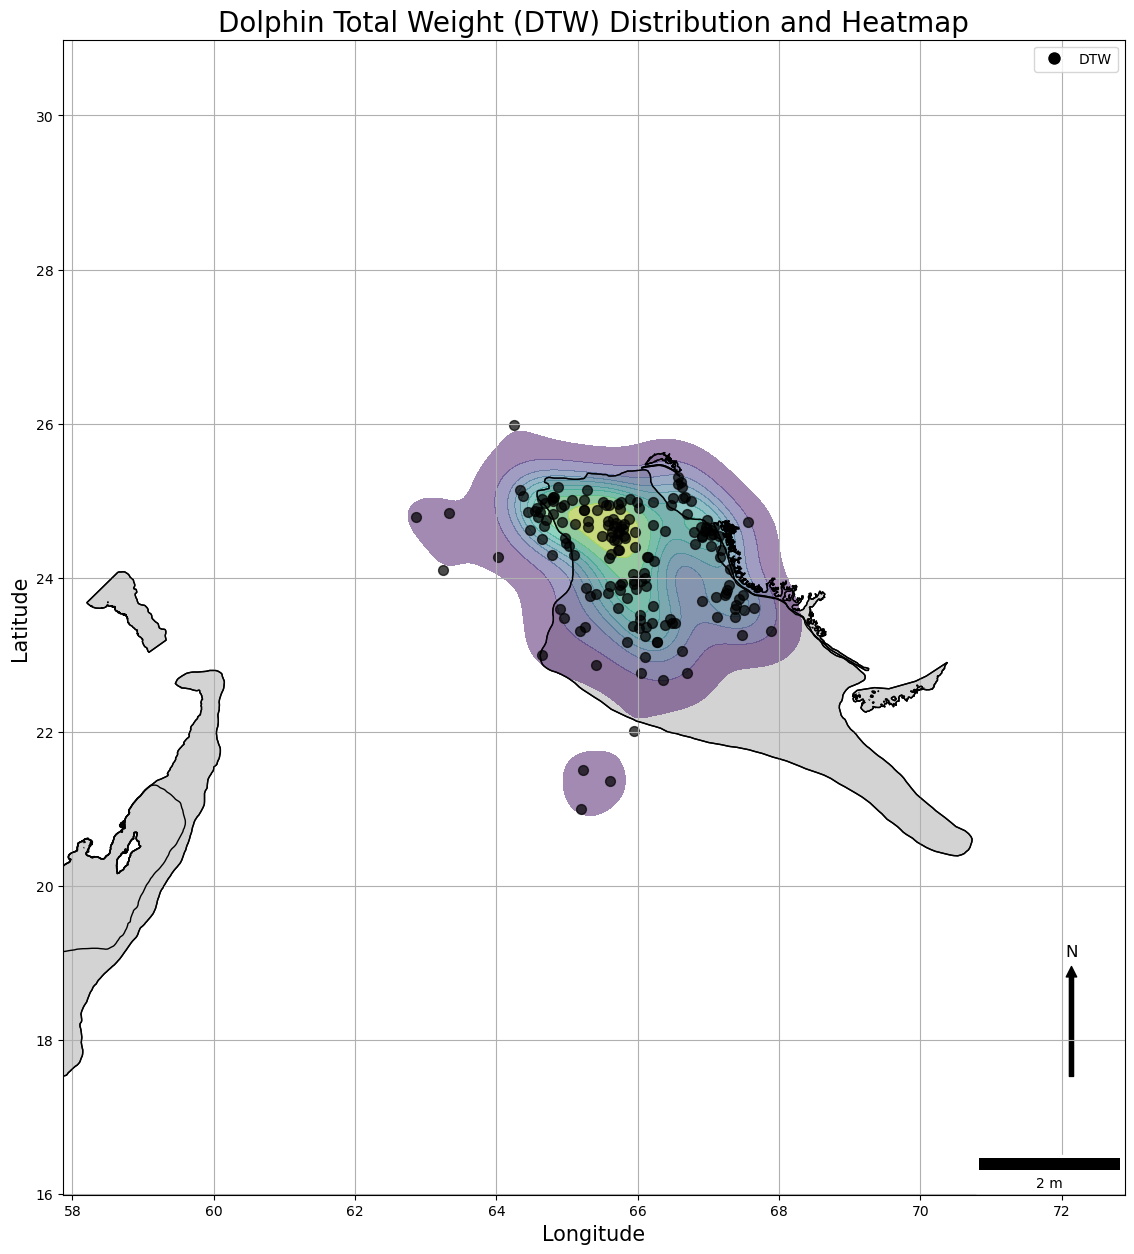

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyArrowPatch
from matplotlib.lines import Line2D
import matplotlib_scalebar.scalebar as sb

# Load the Excel file from the specified path
file_path = r'C:\Users\Shoaib\Desktop\CBOP\CBOB_2012_17_v9.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet2')

# Ensure the GPS coordinate columns are numeric
df['Lat'] = pd.to_numeric(df['Lat'], errors='coerce')
df['Long'] = pd.to_numeric(df['Long'], errors='coerce')

# Drop rows with missing GPS coordinates and DTW data
df = df.dropna(subset=['Lat', 'Long', 'DTW'])

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['Long'], df['Lat']),
    crs="EPSG:4326"  # Set the coordinate reference system to WGS84
)

# Load the shapefile
shapefile_path = r'C:\Users\Shoaib\Downloads\Compressed\iucn-imma\iucn-imma\iucn-imma.shp'
shapefile = gpd.read_file(shapefile_path)

# Function to plot DTW distribution and heatmap on a single map
def plot_dtw_distribution_and_heatmap(gdf, dtw_column, shapefile):
    try:
        dtw_gdf = gdf.dropna(subset=[dtw_column])
        
        if dtw_gdf.empty:
            print(f"No data available for {dtw_column}")
            return

        # Plotting the map
        fig, ax = plt.subplots(figsize=(15, 15))
        shapefile.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
        shapefile.plot(ax=ax, color='lightgrey', edgecolor='black')

        # Plot heatmap
        try:
            sns.kdeplot(
                x=dtw_gdf.geometry.x, 
                y=dtw_gdf.geometry.y, 
                cmap='viridis', 
                fill=True, 
                ax=ax, 
                alpha=0.5
            )
        except ValueError as e:
            print(f"Skipping DTW plotting error: {e}")

        # Plot DTW points
        dtw_gdf.plot(ax=ax, color='black', markersize=50, alpha=0.7, marker='o')

        # Set x and y axis limits to zoom in on the area of interest
        ax.set_xlim(dtw_gdf.geometry.x.min() - 5, dtw_gdf.geometry.x.max() + 5)
        ax.set_ylim(dtw_gdf.geometry.y.min() - 5, dtw_gdf.geometry.y.max() + 5)

        # Adding a scale bar
        scale_bar = sb.ScaleBar(1, location='lower right')
        ax.add_artist(scale_bar)

        # Adding a north arrow
        arrow = FancyArrowPatch((0.95, 0.1), (0.95, 0.2), transform=ax.transAxes,
                                color='black', mutation_scale=15)
        ax.annotate('N', xy=(0.95, 0.21), xycoords='axes fraction', fontsize=12,
                    ha='center', va='center')
        ax.add_patch(arrow)

        plt.title('Dolphin Total Weight (DTW) Distribution and Heatmap', fontsize=20)
        plt.xlabel('Longitude', fontsize=15)
        plt.ylabel('Latitude', fontsize=15)
        plt.grid(True)
        legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='DTW')]
        ax.legend(handles=legend_elements, loc='upper right')

        plt.show()
    except Exception as e:
        print(f"An error occurred while processing DTW: {e}")
        return

# Load and preprocess data
df = pd.read_excel(file_path, sheet_name='Sheet2')
df = df.dropna(subset=['Lat', 'Long'])
df['Lat'] = pd.to_numeric(df['Lat'], errors='coerce')
df['Long'] = pd.to_numeric(df['Long'], errors='coerce')

# Drop rows with missing DTW data
df = df.dropna(subset=['DTW'])

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['Long'], df['Lat']),
    crs="EPSG:4326"
)

# Plot DTW distribution and heatmap on a single map
plot_dtw_distribution_and_heatmap(gdf, 'DTW', shapefile)


Marine turtles 

Whales 